In [1]:

import os
import torch
from torch.utils.data import Dataset, DataLoader
import pydicom
import numpy as np
from torchvision import transforms
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import torch.nn as nn
from torch.utils.data import random_split
from model import MedicalImageCNN, CNNToRNA,CNNClassifier, train_model
import matplotlib.pyplot as plt

from helper import collate_fn
device = torch.device("cpu")

this shows that the image loader works, in rna preprocessing we already sorted everything so no worries and can take index to simply get the indexeth important gene

In [2]:

from helper import PatientDicomDatasetSingleGeneByIndexClass

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.5], std=[0.5])
])
if not os.path.exists('data/Images/NSCLC Radiogenomics'):
         raise FileNotFoundError("The directory 'data/Images/NSCLC Radiogenomics' does not exist.")
if not os.path.exists('data/df_zscore.csv'):
         raise FileNotFoundError("The file 'data/df_zscore.csv' does not exist.")
# Verify that the dataset is properly loaded
dataset =PatientDicomDatasetSingleGeneByIndexClass(root_dir='data/Images/NSCLC Radiogenomics', csv_path='data/df_zscore.csv', transform=transform, index=3)

# Check the length of the dataset to ensure it is not empty
if len(dataset) == 0:
    raise ValueError("The dataset is empty. Please check the root_dir and csv_path for correctness.")
print("Dataset length:", len(dataset))

images, patient_id, gene_value, gene_name = dataset[2]

print("Image tensor shape:", images[0].shape)
print('gene_value:', gene_value)
print('gene_name:', gene_name)

Loading CSV and images...
⚠️ Skipping patient R01-105 due to NaN gene value for NAA38
⚠️ Skipping patient R01-117 due to NaN gene value for NAA38
Dataset length: 128
Image tensor shape: torch.Size([1, 224, 224])
gene_value: tensor(2)
gene_name: NAA38


In [3]:
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

now we are going to train a model for each gene and extract the train loses and val losses to identify meaningful genes

lets do the top 10

Using device: cuda
Loading CSV and images...
Training model for gene: TOR1AIP1 (Index: 0)

Epoch [1/50]


Train Loss: 1.1275 | Val Loss: 1.0959

Epoch [2/50]


Train Loss: 1.0980 | Val Loss: 1.0912

Epoch [3/50]


Train Loss: 1.0725 | Val Loss: 1.0189

Epoch [4/50]


Train Loss: 0.9582 | Val Loss: 0.9907

Epoch [5/50]


Train Loss: 0.8963 | Val Loss: 1.0056

Epoch [6/50]


Train Loss: 0.8341 | Val Loss: 1.0813
⏹️ Early stopping triggered at epoch 6
Finished training for gene: TOR1AIP1
Loading CSV and images...
Training model for gene: CHD7 (Index: 1)

Epoch [1/50]


Train Loss: 1.2938 | Val Loss: 0.4172

Epoch [2/50]


Train Loss: 0.5658 | Val Loss: 0.3686

Epoch [3/50]


Train Loss: 0.5171 | Val Loss: 0.3624

Epoch [4/50]


Train Loss: 0.4904 | Val Loss: 0.3765

Epoch [5/50]


Train Loss: 0.4998 | Val Loss: 0.4147
⏹️ Early stopping triggered at epoch 5
Finished training for gene: CHD7
Loading CSV and images...
Training model for gene: ZFYVE26 (Index: 2)

Epoch [1/50]


Train Loss: 1.2300 | Val Loss: 0.7266

Epoch [2/50]


Train Loss: 0.5952 | Val Loss: 0.8705

Epoch [3/50]


Train Loss: 0.6008 | Val Loss: 0.7219

Epoch [4/50]


Train Loss: 0.6009 | Val Loss: 0.7317

Epoch [5/50]


Train Loss: 0.5730 | Val Loss: 0.6574

Epoch [6/50]


Train Loss: 0.6064 | Val Loss: 0.6687

Epoch [7/50]


Train Loss: 0.5873 | Val Loss: 0.6604
⏹️ Early stopping triggered at epoch 7
Finished training for gene: ZFYVE26
Loading CSV and images...
⚠️ Skipping patient R01-105 due to NaN gene value for NAA38
⚠️ Skipping patient R01-117 due to NaN gene value for NAA38
Training model for gene: NAA38 (Index: 3)

Epoch [1/50]


Train Loss: 1.2635 | Val Loss: 0.5109

Epoch [2/50]


Train Loss: 0.4584 | Val Loss: 0.4208

Epoch [3/50]


Train Loss: 0.4559 | Val Loss: 0.4472

Epoch [4/50]


Train Loss: 0.3990 | Val Loss: 0.6550
⏹️ Early stopping triggered at epoch 4
Finished training for gene: NAA38
Loading CSV and images...
⚠️ Skipping patient R01-059 due to NaN gene value for CASP2
Training model for gene: CASP2 (Index: 4)

Epoch [1/50]


Train Loss: 1.7307 | Val Loss: 0.8086

Epoch [2/50]


Train Loss: 0.3183 | Val Loss: 0.4454

Epoch [3/50]


Train Loss: 0.3295 | Val Loss: 0.6050

Epoch [4/50]


Train Loss: 0.3278 | Val Loss: 0.5689
⏹️ Early stopping triggered at epoch 4
Finished training for gene: CASP2
Loading CSV and images...
⚠️ Skipping patient R01-005 due to NaN gene value for DLG2
⚠️ Skipping patient R01-037 due to NaN gene value for DLG2
⚠️ Skipping patient R01-046 due to NaN gene value for DLG2
⚠️ Skipping patient R01-052 due to NaN gene value for DLG2
⚠️ Skipping patient R01-054 due to NaN gene value for DLG2
⚠️ Skipping patient R01-059 due to NaN gene value for DLG2
⚠️ Skipping patient R01-069 due to NaN gene value for DLG2
⚠️ Skipping patient R01-072 due to NaN gene value for DLG2
⚠️ Skipping patient R01-150 due to NaN gene value for DLG2
⚠️ Skipping patient R01-157 due to NaN gene value for DLG2
Training model for gene: DLG2 (Index: 5)

Epoch [1/50]


Train Loss: 1.0972 | Val Loss: 1.1007

Epoch [2/50]


Train Loss: 1.0647 | Val Loss: 1.1210

Epoch [3/50]


Train Loss: 1.0344 | Val Loss: 1.1548
⏹️ Early stopping triggered at epoch 3
Finished training for gene: DLG2
Loading CSV and images...
⚠️ Skipping patient R01-018 due to NaN gene value for DNAL1
Training model for gene: DNAL1 (Index: 6)

Epoch [1/50]


Train Loss: 1.7788 | Val Loss: 0.4187

Epoch [2/50]


Train Loss: 0.4384 | Val Loss: 0.4556

Epoch [3/50]


Train Loss: 0.5236 | Val Loss: 0.4137

Epoch [4/50]


Train Loss: 0.4204 | Val Loss: 0.4386

Epoch [5/50]


Train Loss: 0.3941 | Val Loss: 0.5517
⏹️ Early stopping triggered at epoch 5
Finished training for gene: DNAL1
Loading CSV and images...
⚠️ Skipping patient R01-004 due to NaN gene value for ANKRD30BL
⚠️ Skipping patient R01-043 due to NaN gene value for ANKRD30BL
⚠️ Skipping patient R01-052 due to NaN gene value for ANKRD30BL
⚠️ Skipping patient R01-056 due to NaN gene value for ANKRD30BL
⚠️ Skipping patient R01-062 due to NaN gene value for ANKRD30BL
⚠️ Skipping patient R01-077 due to NaN gene value for ANKRD30BL
⚠️ Skipping patient R01-094 due to NaN gene value for ANKRD30BL
⚠️ Skipping patient R01-153 due to NaN gene value for ANKRD30BL
⚠️ Skipping patient R01-156 due to NaN gene value for ANKRD30BL
⚠️ Skipping patient R01-157 due to NaN gene value for ANKRD30BL
⚠️ Skipping patient R01-159 due to NaN gene value for ANKRD30BL
Training model for gene: ANKRD30BL (Index: 7)

Epoch [1/50]


Train Loss: 1.0459 | Val Loss: 1.0026

Epoch [2/50]


Train Loss: 0.9252 | Val Loss: 1.0246

Epoch [3/50]


Train Loss: 0.9198 | Val Loss: 1.0504
⏹️ Early stopping triggered at epoch 3
Finished training for gene: ANKRD30BL
Loading CSV and images...
⚠️ Skipping patient R01-051 due to NaN gene value for ORAI2
⚠️ Skipping patient R01-052 due to NaN gene value for ORAI2
⚠️ Skipping patient R01-069 due to NaN gene value for ORAI2
Training model for gene: ORAI2 (Index: 8)

Epoch [1/50]


Train Loss: 1.1309 | Val Loss: 0.0484

Epoch [2/50]


Train Loss: 0.3952 | Val Loss: 0.0859

Epoch [3/50]


Train Loss: 0.4042 | Val Loss: 0.0136

Epoch [4/50]


Train Loss: 0.3626 | Val Loss: 0.0732

Epoch [5/50]


Train Loss: 0.4124 | Val Loss: 0.1918
⏹️ Early stopping triggered at epoch 5
Finished training for gene: ORAI2
Loading CSV and images...
⚠️ Skipping patient R01-013 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-018 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-021 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-022 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-027 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-037 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-052 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-061 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-065 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-069 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-073 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-093 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-096 due to NaN gene value for PDE3A
⚠️ Skipping patient R01-160 due to NaN gene value for PDE3A
Training model for gene

Train Loss: 1.0717 | Val Loss: 1.1332

Epoch [2/50]


Train Loss: 0.9549 | Val Loss: 1.2067

Epoch [3/50]


Train Loss: 0.9426 | Val Loss: 1.0708

Epoch [4/50]


Train Loss: 0.9987 | Val Loss: 1.0538

Epoch [5/50]


Train Loss: 0.9422 | Val Loss: 1.1086

Epoch [6/50]


Train Loss: 0.9347 | Val Loss: 1.2712
⏹️ Early stopping triggered at epoch 6
Finished training for gene: PDE3A
Loading CSV and images...
Training model for gene: SEC22A (Index: 10)

Epoch [1/50]


Train Loss: 1.6747 | Val Loss: 0.6776

Epoch [2/50]


Train Loss: 0.4802 | Val Loss: 0.4968

Epoch [3/50]


Train Loss: 0.3932 | Val Loss: 0.3354

Epoch [4/50]


Train Loss: 0.3267 | Val Loss: 0.3235

Epoch [5/50]


Train Loss: 0.3518 | Val Loss: 0.3227

Epoch [6/50]


Train Loss: 0.3098 | Val Loss: 0.3411
⏹️ Early stopping triggered at epoch 6
Finished training for gene: SEC22A
Loading CSV and images...
Training model for gene: SYPL1 (Index: 11)

Epoch [1/50]


Train Loss: 1.1810 | Val Loss: 8.6924

Epoch [2/50]


Train Loss: 0.8035 | Val Loss: 1.3631

Epoch [3/50]


Train Loss: 0.3390 | Val Loss: 0.8462

Epoch [4/50]


Train Loss: 0.2439 | Val Loss: 0.7476

Epoch [5/50]


Train Loss: 0.2298 | Val Loss: 0.7212

Epoch [6/50]


Train Loss: 0.2254 | Val Loss: 0.7998

Epoch [7/50]


Train Loss: 0.1751 | Val Loss: 1.0885
⏹️ Early stopping triggered at epoch 7
Finished training for gene: SYPL1
Loading CSV and images...
⚠️ Skipping patient R01-022 due to NaN gene value for RCOR1
⚠️ Skipping patient R01-037 due to NaN gene value for RCOR1
Training model for gene: RCOR1 (Index: 12)

Epoch [1/50]


Train Loss: 1.1556 | Val Loss: 1.4638

Epoch [2/50]


Train Loss: 0.5728 | Val Loss: 0.2164

Epoch [3/50]


Train Loss: 0.3228 | Val Loss: 0.3043

Epoch [4/50]


Train Loss: 0.2893 | Val Loss: 0.2220
⏹️ Early stopping triggered at epoch 4
Finished training for gene: RCOR1
Loading CSV and images...
Training model for gene: SAV1 (Index: 13)

Epoch [1/50]


Train Loss: 2.9844 | Val Loss: 0.0193

Epoch [2/50]


Train Loss: 0.4533 | Val Loss: 0.0877

Epoch [3/50]


Train Loss: 0.3245 | Val Loss: 0.0614
⏹️ Early stopping triggered at epoch 3
Finished training for gene: SAV1
Loading CSV and images...
⚠️ Skipping patient R01-037 due to NaN gene value for ATAD3C
⚠️ Skipping patient R01-054 due to NaN gene value for ATAD3C
⚠️ Skipping patient R01-093 due to NaN gene value for ATAD3C
⚠️ Skipping patient R01-100 due to NaN gene value for ATAD3C
⚠️ Skipping patient R01-101 due to NaN gene value for ATAD3C
⚠️ Skipping patient R01-102 due to NaN gene value for ATAD3C
⚠️ Skipping patient R01-103 due to NaN gene value for ATAD3C
⚠️ Skipping patient R01-105 due to NaN gene value for ATAD3C
⚠️ Skipping patient R01-108 due to NaN gene value for ATAD3C
⚠️ Skipping patient R01-114 due to NaN gene value for ATAD3C
⚠️ Skipping patient R01-118 due to NaN gene value for ATAD3C
⚠️ Skipping patient R01-119 due to NaN gene value for ATAD3C
⚠️ Skipping patient R01-120 due to NaN gene value for ATAD3C
⚠️ Skipping patient R01-121 due to NaN gene value for ATAD3C
⚠️ Skippin

Train Loss: 1.0397 | Val Loss: 1.6758

Epoch [2/50]


Train Loss: 0.7563 | Val Loss: 0.2601

Epoch [3/50]


Train Loss: 0.3012 | Val Loss: 0.5062

Epoch [4/50]


Train Loss: 0.2094 | Val Loss: 0.3224
⏹️ Early stopping triggered at epoch 4
Finished training for gene: ATAD3C
Loading CSV and images...
⚠️ Skipping patient R01-004 due to NaN gene value for NOX4
⚠️ Skipping patient R01-006 due to NaN gene value for NOX4
⚠️ Skipping patient R01-022 due to NaN gene value for NOX4
⚠️ Skipping patient R01-031 due to NaN gene value for NOX4
⚠️ Skipping patient R01-040 due to NaN gene value for NOX4
⚠️ Skipping patient R01-052 due to NaN gene value for NOX4
⚠️ Skipping patient R01-059 due to NaN gene value for NOX4
⚠️ Skipping patient R01-063 due to NaN gene value for NOX4
⚠️ Skipping patient R01-066 due to NaN gene value for NOX4
⚠️ Skipping patient R01-067 due to NaN gene value for NOX4
⚠️ Skipping patient R01-071 due to NaN gene value for NOX4
⚠️ Skipping patient R01-080 due to NaN gene value for NOX4
⚠️ Skipping patient R01-096 due to NaN gene value for NOX4
⚠️ Skipping patient R01-100 due to NaN gene value for NOX4
⚠️ Skipping patient R01-115 due to N

Train Loss: 1.3294 | Val Loss: 1.7003

Epoch [2/50]


Train Loss: 0.4807 | Val Loss: 0.5541

Epoch [3/50]


Train Loss: 0.4962 | Val Loss: 0.5656

Epoch [4/50]


Train Loss: 0.3310 | Val Loss: 0.4589

Epoch [5/50]


Train Loss: 0.3396 | Val Loss: 0.4522

Epoch [6/50]


Train Loss: 0.2483 | Val Loss: 0.6083

Epoch [7/50]


Train Loss: 0.2854 | Val Loss: 0.6063
⏹️ Early stopping triggered at epoch 7
Finished training for gene: NOX4
Loading CSV and images...
⚠️ Skipping patient R01-052 due to NaN gene value for ZNF485
⚠️ Skipping patient R01-064 due to NaN gene value for ZNF485
⚠️ Skipping patient R01-083 due to NaN gene value for ZNF485
⚠️ Skipping patient R01-105 due to NaN gene value for ZNF485
⚠️ Skipping patient R01-108 due to NaN gene value for ZNF485
⚠️ Skipping patient R01-120 due to NaN gene value for ZNF485
⚠️ Skipping patient R01-121 due to NaN gene value for ZNF485
⚠️ Skipping patient R01-133 due to NaN gene value for ZNF485
⚠️ Skipping patient R01-135 due to NaN gene value for ZNF485
Training model for gene: ZNF485 (Index: 16)

Epoch [1/50]


Train Loss: 1.5568 | Val Loss: 6.3281

Epoch [2/50]


Train Loss: 1.5013 | Val Loss: 0.3677

Epoch [3/50]


Train Loss: 0.2680 | Val Loss: 0.3514

Epoch [4/50]


Train Loss: 0.2208 | Val Loss: 0.3415

Epoch [5/50]


Train Loss: 0.2496 | Val Loss: 0.3307

Epoch [6/50]


Train Loss: 0.2217 | Val Loss: 0.3297

Epoch [7/50]


Train Loss: 0.2277 | Val Loss: 0.3488
⏹️ Early stopping triggered at epoch 7
Finished training for gene: ZNF485
Loading CSV and images...
⚠️ Skipping patient R01-133 due to NaN gene value for RANBP1
Training model for gene: RANBP1 (Index: 17)

Epoch [1/50]


Train Loss: 1.2594 | Val Loss: 0.9589

Epoch [2/50]


Train Loss: 1.0441 | Val Loss: 1.0466

Epoch [3/50]


Train Loss: 1.0136 | Val Loss: 0.9522

Epoch [4/50]


Train Loss: 1.0522 | Val Loss: 0.9508

Epoch [5/50]


Train Loss: 1.0097 | Val Loss: 0.7597

Epoch [6/50]


Train Loss: 1.0098 | Val Loss: 0.9234

Epoch [7/50]


Train Loss: 1.0221 | Val Loss: 0.8881
⏹️ Early stopping triggered at epoch 7
Finished training for gene: RANBP1
Loading CSV and images...
⚠️ Skipping patient R01-024 due to NaN gene value for ANKRD28
⚠️ Skipping patient R01-031 due to NaN gene value for ANKRD28
Training model for gene: ANKRD28 (Index: 18)

Epoch [1/50]


Train Loss: 2.3375 | Val Loss: 0.4682

Epoch [2/50]


Train Loss: 0.4671 | Val Loss: 0.2415

Epoch [3/50]


Train Loss: 0.3996 | Val Loss: 0.2317

Epoch [4/50]


Train Loss: 0.3879 | Val Loss: 0.2284

Epoch [5/50]


Train Loss: 0.4012 | Val Loss: 0.2230

Epoch [6/50]


Train Loss: 0.3829 | Val Loss: 0.2258

Epoch [7/50]


Train Loss: 0.3724 | Val Loss: 0.2315
⏹️ Early stopping triggered at epoch 7
Finished training for gene: ANKRD28
Loading CSV and images...
Training model for gene: SNORA37 (Index: 19)

Epoch [1/50]


Train Loss: 0.9938 | Val Loss: 0.9525

Epoch [2/50]


Train Loss: 1.0097 | Val Loss: 0.9335

Epoch [3/50]


Train Loss: 0.8934 | Val Loss: 0.9550

Epoch [4/50]


Train Loss: 0.9132 | Val Loss: 0.9370
⏹️ Early stopping triggered at epoch 4
Finished training for gene: SNORA37
Loading CSV and images...
Training model for gene: RAB11FIP4 (Index: 20)

Epoch [1/50]


Train Loss: 0.6985 | Val Loss: 0.0000

Epoch [2/50]


Train Loss: 1.0004 | Val Loss: 0.3599

Epoch [3/50]


Train Loss: 0.2920 | Val Loss: 0.0005
⏹️ Early stopping triggered at epoch 3
Finished training for gene: RAB11FIP4
Loading CSV and images...
⚠️ Skipping patient R01-015 due to NaN gene value for OSCP1
⚠️ Skipping patient R01-040 due to NaN gene value for OSCP1
⚠️ Skipping patient R01-049 due to NaN gene value for OSCP1
⚠️ Skipping patient R01-051 due to NaN gene value for OSCP1
⚠️ Skipping patient R01-055 due to NaN gene value for OSCP1
⚠️ Skipping patient R01-064 due to NaN gene value for OSCP1
⚠️ Skipping patient R01-069 due to NaN gene value for OSCP1
⚠️ Skipping patient R01-093 due to NaN gene value for OSCP1
⚠️ Skipping patient R01-096 due to NaN gene value for OSCP1
⚠️ Skipping patient R01-106 due to NaN gene value for OSCP1
⚠️ Skipping patient R01-108 due to NaN gene value for OSCP1
⚠️ Skipping patient R01-125 due to NaN gene value for OSCP1
⚠️ Skipping patient R01-129 due to NaN gene value for OSCP1
⚠️ Skipping patient R01-133 due to NaN gene value for OSCP1
⚠️ Skipping patient

Train Loss: 1.3737 | Val Loss: 0.9724

Epoch [2/50]


Train Loss: 0.4856 | Val Loss: 1.8030

Epoch [3/50]


Train Loss: 0.5204 | Val Loss: 0.6976

Epoch [4/50]


Train Loss: 0.4481 | Val Loss: 0.6962

Epoch [5/50]


Train Loss: 0.4949 | Val Loss: 0.6867

Epoch [6/50]


Train Loss: 0.4978 | Val Loss: 0.7737

Epoch [7/50]


Train Loss: 0.4132 | Val Loss: 0.6605

Epoch [8/50]


Train Loss: 0.3817 | Val Loss: 0.6355

Epoch [9/50]


Train Loss: 0.4865 | Val Loss: 0.6553

Epoch [10/50]


Train Loss: 0.3822 | Val Loss: 0.9643
⏹️ Early stopping triggered at epoch 10
Finished training for gene: OSCP1
Loading CSV and images...
⚠️ Skipping patient R01-037 due to NaN gene value for YY1AP1
⚠️ Skipping patient R01-100 due to NaN gene value for YY1AP1
⚠️ Skipping patient R01-114 due to NaN gene value for YY1AP1
Training model for gene: YY1AP1 (Index: 22)

Epoch [1/50]


Train Loss: 1.1342 | Val Loss: 1.0911

Epoch [2/50]


Train Loss: 1.0323 | Val Loss: 1.1940

Epoch [3/50]


Train Loss: 0.9943 | Val Loss: 1.5055
⏹️ Early stopping triggered at epoch 3
Finished training for gene: YY1AP1
Loading CSV and images...
⚠️ Skipping patient R01-004 due to NaN gene value for SGIP1
⚠️ Skipping patient R01-007 due to NaN gene value for SGIP1
⚠️ Skipping patient R01-013 due to NaN gene value for SGIP1
⚠️ Skipping patient R01-021 due to NaN gene value for SGIP1
⚠️ Skipping patient R01-022 due to NaN gene value for SGIP1
⚠️ Skipping patient R01-029 due to NaN gene value for SGIP1
⚠️ Skipping patient R01-033 due to NaN gene value for SGIP1
⚠️ Skipping patient R01-037 due to NaN gene value for SGIP1
⚠️ Skipping patient R01-041 due to NaN gene value for SGIP1
⚠️ Skipping patient R01-043 due to NaN gene value for SGIP1
⚠️ Skipping patient R01-061 due to NaN gene value for SGIP1
⚠️ Skipping patient R01-063 due to NaN gene value for SGIP1
⚠️ Skipping patient R01-068 due to NaN gene value for SGIP1
⚠️ Skipping patient R01-069 due to NaN gene value for SGIP1
⚠️ Skipping patient R0

Train Loss: 1.2709 | Val Loss: 6.2510

Epoch [2/50]


Train Loss: 0.8145 | Val Loss: 0.8832

Epoch [3/50]


Train Loss: 0.4626 | Val Loss: 0.9045

Epoch [4/50]


Train Loss: 0.4223 | Val Loss: 0.8597

Epoch [5/50]


Train Loss: 0.3730 | Val Loss: 0.9860

Epoch [6/50]


Train Loss: 0.3484 | Val Loss: 1.0415
⏹️ Early stopping triggered at epoch 6
Finished training for gene: SGIP1
Loading CSV and images...
⚠️ Skipping patient R01-004 due to NaN gene value for SNORA54
⚠️ Skipping patient R01-007 due to NaN gene value for SNORA54
⚠️ Skipping patient R01-015 due to NaN gene value for SNORA54
⚠️ Skipping patient R01-017 due to NaN gene value for SNORA54
⚠️ Skipping patient R01-021 due to NaN gene value for SNORA54
⚠️ Skipping patient R01-039 due to NaN gene value for SNORA54
⚠️ Skipping patient R01-043 due to NaN gene value for SNORA54
⚠️ Skipping patient R01-048 due to NaN gene value for SNORA54
⚠️ Skipping patient R01-051 due to NaN gene value for SNORA54
⚠️ Skipping patient R01-063 due to NaN gene value for SNORA54
⚠️ Skipping patient R01-064 due to NaN gene value for SNORA54
⚠️ Skipping patient R01-065 due to NaN gene value for SNORA54
⚠️ Skipping patient R01-077 due to NaN gene value for SNORA54
⚠️ Skipping patient R01-079 due to NaN gene value for SNO

Train Loss: 1.6142 | Val Loss: 0.6301

Epoch [2/50]


Train Loss: 0.7469 | Val Loss: 0.5535

Epoch [3/50]


Train Loss: 0.7291 | Val Loss: 0.6804

Epoch [4/50]


Train Loss: 0.7235 | Val Loss: 0.5452

Epoch [5/50]


Train Loss: 0.7214 | Val Loss: 0.6409

Epoch [6/50]


Train Loss: 0.7705 | Val Loss: 0.5511
⏹️ Early stopping triggered at epoch 6
Finished training for gene: SNORA54
Loading CSV and images...
Training model for gene: BTRC (Index: 25)

Epoch [1/50]


Train Loss: 1.1652 | Val Loss: 0.9402

Epoch [2/50]


Train Loss: 1.0328 | Val Loss: 0.8746

Epoch [3/50]


Train Loss: 1.0352 | Val Loss: 0.9551

Epoch [4/50]


Train Loss: 1.0111 | Val Loss: 0.7541

Epoch [5/50]


Train Loss: 1.0467 | Val Loss: 0.8361

Epoch [6/50]


Train Loss: 1.0075 | Val Loss: 0.8423
⏹️ Early stopping triggered at epoch 6
Finished training for gene: BTRC
Loading CSV and images...
Training model for gene: TSNARE1 (Index: 26)

Epoch [1/50]


Train Loss: 1.0054 | Val Loss: 0.0000

Epoch [2/50]


Train Loss: 0.7547 | Val Loss: 0.0323

Epoch [3/50]


Train Loss: 0.2514 | Val Loss: 0.0276
⏹️ Early stopping triggered at epoch 3
Finished training for gene: TSNARE1
Loading CSV and images...
⚠️ Skipping patient R01-022 due to NaN gene value for SIDT1
⚠️ Skipping patient R01-052 due to NaN gene value for SIDT1
⚠️ Skipping patient R01-097 due to NaN gene value for SIDT1
⚠️ Skipping patient R01-106 due to NaN gene value for SIDT1
⚠️ Skipping patient R01-117 due to NaN gene value for SIDT1
⚠️ Skipping patient R01-124 due to NaN gene value for SIDT1
⚠️ Skipping patient R01-133 due to NaN gene value for SIDT1
Training model for gene: SIDT1 (Index: 27)

Epoch [1/50]


Train Loss: 1.0163 | Val Loss: 1.1899

Epoch [2/50]


Train Loss: 0.9176 | Val Loss: 1.2119

Epoch [3/50]


Train Loss: 0.8661 | Val Loss: 1.2206
⏹️ Early stopping triggered at epoch 3
Finished training for gene: SIDT1
Loading CSV and images...
⚠️ Skipping patient R01-037 due to NaN gene value for CDON
⚠️ Skipping patient R01-052 due to NaN gene value for CDON
⚠️ Skipping patient R01-059 due to NaN gene value for CDON
⚠️ Skipping patient R01-093 due to NaN gene value for CDON
⚠️ Skipping patient R01-096 due to NaN gene value for CDON
⚠️ Skipping patient R01-103 due to NaN gene value for CDON
⚠️ Skipping patient R01-129 due to NaN gene value for CDON
⚠️ Skipping patient R01-130 due to NaN gene value for CDON
⚠️ Skipping patient R01-147 due to NaN gene value for CDON
Training model for gene: CDON (Index: 28)

Epoch [1/50]


Train Loss: 0.7547 | Val Loss: 0.0000

Epoch [2/50]


Train Loss: 0.9338 | Val Loss: 0.0000

Epoch [3/50]


Train Loss: 0.9586 | Val Loss: 0.0000
⏹️ Early stopping triggered at epoch 3
Finished training for gene: CDON
Loading CSV and images...
⚠️ Skipping patient R01-018 due to NaN gene value for HLA-DRB1
⚠️ Skipping patient R01-021 due to NaN gene value for HLA-DRB1
⚠️ Skipping patient R01-022 due to NaN gene value for HLA-DRB1
⚠️ Skipping patient R01-042 due to NaN gene value for HLA-DRB1
⚠️ Skipping patient R01-051 due to NaN gene value for HLA-DRB1
⚠️ Skipping patient R01-054 due to NaN gene value for HLA-DRB1
⚠️ Skipping patient R01-059 due to NaN gene value for HLA-DRB1
⚠️ Skipping patient R01-065 due to NaN gene value for HLA-DRB1
⚠️ Skipping patient R01-069 due to NaN gene value for HLA-DRB1
⚠️ Skipping patient R01-077 due to NaN gene value for HLA-DRB1
⚠️ Skipping patient R01-096 due to NaN gene value for HLA-DRB1
⚠️ Skipping patient R01-097 due to NaN gene value for HLA-DRB1
⚠️ Skipping patient R01-100 due to NaN gene value for HLA-DRB1
⚠️ Skipping patient R01-118 due to NaN gene v

Train Loss: 1.0192 | Val Loss: 0.9285

Epoch [2/50]


Train Loss: 0.8118 | Val Loss: 0.9580

Epoch [3/50]


Train Loss: 0.8655 | Val Loss: 0.9326
⏹️ Early stopping triggered at epoch 3
Finished training for gene: HLA-DRB1
Loading CSV and images...
⚠️ Skipping patient R01-119 due to NaN gene value for SNORA47
⚠️ Skipping patient R01-133 due to NaN gene value for SNORA47
Training model for gene: SNORA47 (Index: 30)

Epoch [1/50]


Train Loss: 1.0916 | Val Loss: 1.0996

Epoch [2/50]


Train Loss: 0.9601 | Val Loss: 1.1949

Epoch [3/50]


Train Loss: 0.9946 | Val Loss: 1.0778

Epoch [4/50]


Train Loss: 0.9646 | Val Loss: 1.1144

Epoch [5/50]


Train Loss: 0.9336 | Val Loss: 1.2668
⏹️ Early stopping triggered at epoch 5
Finished training for gene: SNORA47
Loading CSV and images...
⚠️ Skipping patient R01-037 due to NaN gene value for RPS29
⚠️ Skipping patient R01-042 due to NaN gene value for RPS29
Training model for gene: RPS29 (Index: 31)

Epoch [1/50]


Train Loss: 2.2579 | Val Loss: 0.5947

Epoch [2/50]


Train Loss: 0.6675 | Val Loss: 0.6232

Epoch [3/50]


Train Loss: 0.7053 | Val Loss: 0.7356
⏹️ Early stopping triggered at epoch 3
Finished training for gene: RPS29
Loading CSV and images...
Training model for gene: SETD3 (Index: 32)

Epoch [1/50]


Train Loss: 0.8285 | Val Loss: 0.0000

Epoch [2/50]


Train Loss: 0.9342 | Val Loss: 0.0000

Epoch [3/50]


Train Loss: 1.0896 | Val Loss: 0.0000
⏹️ Early stopping triggered at epoch 3
Finished training for gene: SETD3
Loading CSV and images...
⚠️ Skipping patient R01-015 due to NaN gene value for GPC3
⚠️ Skipping patient R01-022 due to NaN gene value for GPC3
⚠️ Skipping patient R01-027 due to NaN gene value for GPC3
⚠️ Skipping patient R01-029 due to NaN gene value for GPC3
⚠️ Skipping patient R01-037 due to NaN gene value for GPC3
⚠️ Skipping patient R01-051 due to NaN gene value for GPC3
⚠️ Skipping patient R01-052 due to NaN gene value for GPC3
⚠️ Skipping patient R01-055 due to NaN gene value for GPC3
⚠️ Skipping patient R01-097 due to NaN gene value for GPC3
⚠️ Skipping patient R01-160 due to NaN gene value for GPC3
Training model for gene: GPC3 (Index: 33)

Epoch [1/50]


Train Loss: 1.1045 | Val Loss: 1.0803

Epoch [2/50]


Train Loss: 1.0488 | Val Loss: 1.1124

Epoch [3/50]


Train Loss: 0.9691 | Val Loss: 1.3546
⏹️ Early stopping triggered at epoch 3
Finished training for gene: GPC3
Loading CSV and images...
⚠️ Skipping patient R01-052 due to NaN gene value for TNFAIP8
Training model for gene: TNFAIP8 (Index: 34)

Epoch [1/50]


Train Loss: 0.6850 | Val Loss: 0.2262

Epoch [2/50]


Train Loss: 0.4336 | Val Loss: 0.5063

Epoch [3/50]


Train Loss: 0.3930 | Val Loss: 0.4537
⏹️ Early stopping triggered at epoch 3
Finished training for gene: TNFAIP8
Loading CSV and images...
⚠️ Skipping patient R01-005 due to NaN gene value for LARGE
⚠️ Skipping patient R01-129 due to NaN gene value for LARGE
Training model for gene: LARGE (Index: 35)

Epoch [1/50]


Train Loss: 1.0449 | Val Loss: 1.0206

Epoch [2/50]


Train Loss: 0.7649 | Val Loss: 0.9040

Epoch [3/50]


Train Loss: 0.7521 | Val Loss: 0.9527

Epoch [4/50]


Train Loss: 0.8629 | Val Loss: 1.0435
⏹️ Early stopping triggered at epoch 4
Finished training for gene: LARGE
Loading CSV and images...
⚠️ Skipping patient R01-005 due to NaN gene value for LILRB3
⚠️ Skipping patient R01-006 due to NaN gene value for LILRB3
⚠️ Skipping patient R01-022 due to NaN gene value for LILRB3
⚠️ Skipping patient R01-027 due to NaN gene value for LILRB3
⚠️ Skipping patient R01-029 due to NaN gene value for LILRB3
⚠️ Skipping patient R01-048 due to NaN gene value for LILRB3
⚠️ Skipping patient R01-051 due to NaN gene value for LILRB3
⚠️ Skipping patient R01-052 due to NaN gene value for LILRB3
⚠️ Skipping patient R01-055 due to NaN gene value for LILRB3
⚠️ Skipping patient R01-065 due to NaN gene value for LILRB3
⚠️ Skipping patient R01-069 due to NaN gene value for LILRB3
⚠️ Skipping patient R01-071 due to NaN gene value for LILRB3
⚠️ Skipping patient R01-073 due to NaN gene value for LILRB3
⚠️ Skipping patient R01-097 due to NaN gene value for LILRB3
⚠️ Skippi

Train Loss: 3.1091 | Val Loss: 1.0290

Epoch [2/50]


Train Loss: 0.6204 | Val Loss: 0.7333

Epoch [3/50]


Train Loss: 0.5389 | Val Loss: 0.7960

Epoch [4/50]


Train Loss: 0.5228 | Val Loss: 0.8441
⏹️ Early stopping triggered at epoch 4
Finished training for gene: LILRB3
Loading CSV and images...
Training model for gene: APP (Index: 37)

Epoch [1/50]


Train Loss: 1.6282 | Val Loss: 0.0000

Epoch [2/50]


Train Loss: 1.1483 | Val Loss: 0.0000

Epoch [3/50]


Train Loss: 0.4252 | Val Loss: 0.0460
⏹️ Early stopping triggered at epoch 3
Finished training for gene: APP
Loading CSV and images...
⚠️ Skipping patient R01-027 due to NaN gene value for SFTPB
⚠️ Skipping patient R01-055 due to NaN gene value for SFTPB
⚠️ Skipping patient R01-119 due to NaN gene value for SFTPB
⚠️ Skipping patient R01-150 due to NaN gene value for SFTPB
Training model for gene: SFTPB (Index: 38)

Epoch [1/50]


Train Loss: 1.6221 | Val Loss: 0.3510

Epoch [2/50]


Train Loss: 0.7749 | Val Loss: 0.5061

Epoch [3/50]


Train Loss: 0.8053 | Val Loss: 0.3883
⏹️ Early stopping triggered at epoch 3
Finished training for gene: SFTPB
Loading CSV and images...
⚠️ Skipping patient R01-037 due to NaN gene value for PGS1
⚠️ Skipping patient R01-080 due to NaN gene value for PGS1
Training model for gene: PGS1 (Index: 39)

Epoch [1/50]


Train Loss: 0.8054 | Val Loss: 0.4878

Epoch [2/50]


Train Loss: 0.6648 | Val Loss: 0.4309

Epoch [3/50]


Train Loss: 0.5594 | Val Loss: 0.4633

Epoch [4/50]


Train Loss: 0.5882 | Val Loss: 0.5389
⏹️ Early stopping triggered at epoch 4
Finished training for gene: PGS1
Loading CSV and images...
Training model for gene: RPL12 (Index: 40)

Epoch [1/50]


Train Loss: 1.0401 | Val Loss: 0.8469

Epoch [2/50]


Train Loss: 0.9387 | Val Loss: 0.8807

Epoch [3/50]


Train Loss: 0.9861 | Val Loss: 0.9242
⏹️ Early stopping triggered at epoch 3
Finished training for gene: RPL12
Loading CSV and images...
⚠️ Skipping patient R01-051 due to NaN gene value for MEGF8
Training model for gene: MEGF8 (Index: 41)

Epoch [1/50]


Train Loss: 0.0635 | Val Loss: 1.5321

Epoch [2/50]


Train Loss: 0.0000 | Val Loss: 1.5025

Epoch [3/50]


Train Loss: 0.0000 | Val Loss: 1.5444

Epoch [4/50]


Train Loss: 0.0000 | Val Loss: 1.4786

Epoch [5/50]


Train Loss: 0.0000 | Val Loss: 1.4984

Epoch [6/50]


Train Loss: 0.0000 | Val Loss: 1.4975
⏹️ Early stopping triggered at epoch 6
Finished training for gene: MEGF8
Loading CSV and images...
⚠️ Skipping patient R01-052 due to NaN gene value for TSPAN9
Training model for gene: TSPAN9 (Index: 42)

Epoch [1/50]


Train Loss: 1.1330 | Val Loss: 1.0076

Epoch [2/50]


Train Loss: 1.0492 | Val Loss: 0.9798

Epoch [3/50]


Train Loss: 1.0130 | Val Loss: 1.2248

Epoch [4/50]


Train Loss: 0.9848 | Val Loss: 2.5485
⏹️ Early stopping triggered at epoch 4
Finished training for gene: TSPAN9
Loading CSV and images...
⚠️ Skipping patient R01-004 due to NaN gene value for CEACAM5
⚠️ Skipping patient R01-015 due to NaN gene value for CEACAM5
⚠️ Skipping patient R01-018 due to NaN gene value for CEACAM5
⚠️ Skipping patient R01-023 due to NaN gene value for CEACAM5
⚠️ Skipping patient R01-027 due to NaN gene value for CEACAM5
⚠️ Skipping patient R01-031 due to NaN gene value for CEACAM5
⚠️ Skipping patient R01-040 due to NaN gene value for CEACAM5
⚠️ Skipping patient R01-046 due to NaN gene value for CEACAM5
⚠️ Skipping patient R01-052 due to NaN gene value for CEACAM5
⚠️ Skipping patient R01-068 due to NaN gene value for CEACAM5
⚠️ Skipping patient R01-072 due to NaN gene value for CEACAM5
⚠️ Skipping patient R01-099 due to NaN gene value for CEACAM5
⚠️ Skipping patient R01-102 due to NaN gene value for CEACAM5
⚠️ Skipping patient R01-105 due to NaN gene value for CE

Train Loss: 1.4943 | Val Loss: 0.9558

Epoch [2/50]


Train Loss: 1.0746 | Val Loss: 0.9396

Epoch [3/50]


Train Loss: 1.0458 | Val Loss: 0.8924

Epoch [4/50]


Train Loss: 1.0657 | Val Loss: 1.0049

Epoch [5/50]


Train Loss: 1.0448 | Val Loss: 0.9022
⏹️ Early stopping triggered at epoch 5
Finished training for gene: CEACAM5
Loading CSV and images...
⚠️ Skipping patient R01-102 due to NaN gene value for RPS28
⚠️ Skipping patient R01-106 due to NaN gene value for RPS28
⚠️ Skipping patient R01-109 due to NaN gene value for RPS28
⚠️ Skipping patient R01-115 due to NaN gene value for RPS28
⚠️ Skipping patient R01-117 due to NaN gene value for RPS28
⚠️ Skipping patient R01-122 due to NaN gene value for RPS28
⚠️ Skipping patient R01-126 due to NaN gene value for RPS28
⚠️ Skipping patient R01-128 due to NaN gene value for RPS28
⚠️ Skipping patient R01-129 due to NaN gene value for RPS28
⚠️ Skipping patient R01-131 due to NaN gene value for RPS28
⚠️ Skipping patient R01-132 due to NaN gene value for RPS28
⚠️ Skipping patient R01-137 due to NaN gene value for RPS28
⚠️ Skipping patient R01-139 due to NaN gene value for RPS28
⚠️ Skipping patient R01-146 due to NaN gene value for RPS28
Training model for ge

Train Loss: 0.9250 | Val Loss: 0.9209

Epoch [2/50]


Train Loss: 0.9457 | Val Loss: 1.2206

Epoch [3/50]


Train Loss: 0.9028 | Val Loss: 0.9411
⏹️ Early stopping triggered at epoch 3
Finished training for gene: RPS28
Loading CSV and images...
⚠️ Skipping patient R01-052 due to NaN gene value for AASDH
Training model for gene: AASDH (Index: 45)

Epoch [1/50]


Train Loss: 1.2915 | Val Loss: 1.0010

Epoch [2/50]


Train Loss: 0.7815 | Val Loss: 0.9883

Epoch [3/50]


Train Loss: 0.8356 | Val Loss: 0.7971

Epoch [4/50]


Train Loss: 0.7521 | Val Loss: 0.7709

Epoch [5/50]


Train Loss: 0.7861 | Val Loss: 0.8226

Epoch [6/50]


Train Loss: 0.6652 | Val Loss: 0.8978
⏹️ Early stopping triggered at epoch 6
Finished training for gene: AASDH
Loading CSV and images...
Training model for gene: VGLL4 (Index: 46)

Epoch [1/50]


Train Loss: 0.5099 | Val Loss: 0.0000

Epoch [2/50]


Train Loss: 0.5816 | Val Loss: 0.0000

Epoch [3/50]


Train Loss: 0.8073 | Val Loss: 0.0000
⏹️ Early stopping triggered at epoch 3
Finished training for gene: VGLL4
Loading CSV and images...
⚠️ Skipping patient R01-105 due to NaN gene value for PTPN1
Training model for gene: PTPN1 (Index: 47)

Epoch [1/50]


Train Loss: 0.7699 | Val Loss: 0.0000

Epoch [2/50]


Train Loss: 1.1370 | Val Loss: 0.0529

Epoch [3/50]


Train Loss: 0.4805 | Val Loss: 0.0001
⏹️ Early stopping triggered at epoch 3
Finished training for gene: PTPN1
Loading CSV and images...
⚠️ Skipping patient R01-118 due to NaN gene value for ANO9
⚠️ Skipping patient R01-120 due to NaN gene value for ANO9
Training model for gene: ANO9 (Index: 48)

Epoch [1/50]


Train Loss: 0.7208 | Val Loss: 2.2944

Epoch [2/50]


Train Loss: 0.7823 | Val Loss: 2.1678

Epoch [3/50]


Train Loss: 1.1918 | Val Loss: 0.9021

Epoch [4/50]


Train Loss: 0.4069 | Val Loss: 0.6797

Epoch [5/50]


Train Loss: 0.2517 | Val Loss: 0.3312

Epoch [6/50]


Train Loss: 0.2225 | Val Loss: 0.5888

Epoch [7/50]


Train Loss: 0.2667 | Val Loss: 0.4253
⏹️ Early stopping triggered at epoch 7
Finished training for gene: ANO9
Loading CSV and images...
⚠️ Skipping patient R01-027 due to NaN gene value for SFTPA2
⚠️ Skipping patient R01-055 due to NaN gene value for SFTPA2
⚠️ Skipping patient R01-150 due to NaN gene value for SFTPA2
Training model for gene: SFTPA2 (Index: 49)

Epoch [1/50]


Train Loss: 1.1781 | Val Loss: 0.9515

Epoch [2/50]


Train Loss: 0.9595 | Val Loss: 0.7819

Epoch [3/50]


Train Loss: 0.9484 | Val Loss: 0.7926

Epoch [4/50]


Train Loss: 0.9709 | Val Loss: 0.8016
⏹️ Early stopping triggered at epoch 4
Finished training for gene: SFTPA2
Loading CSV and images...
Training model for gene: CDK5RAP1 (Index: 50)

Epoch [1/50]


Train Loss: 0.5247 | Val Loss: 0.0000

Epoch [2/50]


Train Loss: 0.6047 | Val Loss: 0.0000

Epoch [3/50]


Train Loss: 0.5636 | Val Loss: 0.0456
⏹️ Early stopping triggered at epoch 3
Finished training for gene: CDK5RAP1
Loading CSV and images...
⚠️ Skipping patient R01-104 due to NaN gene value for RPL9
⚠️ Skipping patient R01-114 due to NaN gene value for RPL9
⚠️ Skipping patient R01-115 due to NaN gene value for RPL9
Training model for gene: RPL9 (Index: 51)

Epoch [1/50]


Train Loss: 1.5746 | Val Loss: 1.0116

Epoch [2/50]


Train Loss: 1.0229 | Val Loss: 0.9161

Epoch [3/50]


Train Loss: 1.0298 | Val Loss: 0.9339

Epoch [4/50]


Train Loss: 0.9679 | Val Loss: 0.8228

Epoch [5/50]


Train Loss: 0.8219 | Val Loss: 0.9938

Epoch [6/50]


Train Loss: 0.7615 | Val Loss: 0.7369

Epoch [7/50]


Train Loss: 0.7158 | Val Loss: 0.7147

Epoch [8/50]


Train Loss: 0.7129 | Val Loss: 1.0899

Epoch [9/50]


Train Loss: 0.6180 | Val Loss: 0.9295
⏹️ Early stopping triggered at epoch 9
Finished training for gene: RPL9
Loading CSV and images...
Training model for gene: FAM172A (Index: 52)

Epoch [1/50]


Train Loss: 1.7113 | Val Loss: 5.2574

Epoch [2/50]


Train Loss: 0.5854 | Val Loss: 0.7919

Epoch [3/50]


Train Loss: 0.2656 | Val Loss: 0.9580

Epoch [4/50]


Train Loss: 0.3777 | Val Loss: 0.7989
⏹️ Early stopping triggered at epoch 4
Finished training for gene: FAM172A
Loading CSV and images...
⚠️ Skipping patient R01-027 due to NaN gene value for NAALADL2
⚠️ Skipping patient R01-093 due to NaN gene value for NAALADL2
Training model for gene: NAALADL2 (Index: 53)

Epoch [1/50]


Train Loss: 1.3621 | Val Loss: 1.3098

Epoch [2/50]


Train Loss: 0.7953 | Val Loss: 1.0253

Epoch [3/50]


Train Loss: 0.8581 | Val Loss: 1.0293

Epoch [4/50]


Train Loss: 0.8835 | Val Loss: 0.9988

Epoch [5/50]


Train Loss: 0.8430 | Val Loss: 1.0744

Epoch [6/50]


Train Loss: 0.8067 | Val Loss: 1.0706
⏹️ Early stopping triggered at epoch 6
Finished training for gene: NAALADL2
Loading CSV and images...
⚠️ Skipping patient R01-061 due to NaN gene value for HLA-B
⚠️ Skipping patient R01-099 due to NaN gene value for HLA-B
⚠️ Skipping patient R01-100 due to NaN gene value for HLA-B
⚠️ Skipping patient R01-101 due to NaN gene value for HLA-B
⚠️ Skipping patient R01-102 due to NaN gene value for HLA-B
⚠️ Skipping patient R01-103 due to NaN gene value for HLA-B
⚠️ Skipping patient R01-104 due to NaN gene value for HLA-B
⚠️ Skipping patient R01-106 due to NaN gene value for HLA-B
⚠️ Skipping patient R01-109 due to NaN gene value for HLA-B
⚠️ Skipping patient R01-110 due to NaN gene value for HLA-B
⚠️ Skipping patient R01-111 due to NaN gene value for HLA-B
⚠️ Skipping patient R01-115 due to NaN gene value for HLA-B
⚠️ Skipping patient R01-117 due to NaN gene value for HLA-B
⚠️ Skipping patient R01-118 due to NaN gene value for HLA-B
⚠️ Skipping patient 

Train Loss: 1.7566 | Val Loss: 0.9408

Epoch [2/50]


Train Loss: 0.6243 | Val Loss: 1.5094

Epoch [3/50]


Train Loss: 0.7081 | Val Loss: 1.0929
⏹️ Early stopping triggered at epoch 3
Finished training for gene: HLA-B
Loading CSV and images...
⚠️ Skipping patient R01-017 due to NaN gene value for HLA-A
⚠️ Skipping patient R01-018 due to NaN gene value for HLA-A
⚠️ Skipping patient R01-028 due to NaN gene value for HLA-A
⚠️ Skipping patient R01-035 due to NaN gene value for HLA-A
⚠️ Skipping patient R01-040 due to NaN gene value for HLA-A
⚠️ Skipping patient R01-043 due to NaN gene value for HLA-A
⚠️ Skipping patient R01-046 due to NaN gene value for HLA-A
⚠️ Skipping patient R01-051 due to NaN gene value for HLA-A
⚠️ Skipping patient R01-054 due to NaN gene value for HLA-A
⚠️ Skipping patient R01-060 due to NaN gene value for HLA-A
⚠️ Skipping patient R01-061 due to NaN gene value for HLA-A
⚠️ Skipping patient R01-062 due to NaN gene value for HLA-A
⚠️ Skipping patient R01-065 due to NaN gene value for HLA-A
⚠️ Skipping patient R01-073 due to NaN gene value for HLA-A
⚠️ Skipping patient R01

Train Loss: 1.0965 | Val Loss: 0.9372

Epoch [2/50]


Train Loss: 0.8623 | Val Loss: 0.8881

Epoch [3/50]


Train Loss: 0.8011 | Val Loss: 0.9036

Epoch [4/50]


Train Loss: 0.7285 | Val Loss: 0.8981
⏹️ Early stopping triggered at epoch 4
Finished training for gene: HLA-A
Loading CSV and images...
⚠️ Skipping patient R01-005 due to NaN gene value for ZBTB16
⚠️ Skipping patient R01-016 due to NaN gene value for ZBTB16
⚠️ Skipping patient R01-029 due to NaN gene value for ZBTB16
⚠️ Skipping patient R01-032 due to NaN gene value for ZBTB16
⚠️ Skipping patient R01-039 due to NaN gene value for ZBTB16
⚠️ Skipping patient R01-041 due to NaN gene value for ZBTB16
⚠️ Skipping patient R01-065 due to NaN gene value for ZBTB16
⚠️ Skipping patient R01-108 due to NaN gene value for ZBTB16
⚠️ Skipping patient R01-119 due to NaN gene value for ZBTB16
⚠️ Skipping patient R01-124 due to NaN gene value for ZBTB16
⚠️ Skipping patient R01-134 due to NaN gene value for ZBTB16
Training model for gene: ZBTB16 (Index: 56)

Epoch [1/50]


Train Loss: 1.1516 | Val Loss: 1.0542

Epoch [2/50]


Train Loss: 1.0653 | Val Loss: 1.0099

Epoch [3/50]


Train Loss: 1.0413 | Val Loss: 1.0604

Epoch [4/50]


Train Loss: 1.0779 | Val Loss: 0.9895

Epoch [5/50]


Train Loss: 1.0667 | Val Loss: 1.0009

Epoch [6/50]


Train Loss: 1.0133 | Val Loss: 1.0163
⏹️ Early stopping triggered at epoch 6
Finished training for gene: ZBTB16
Loading CSV and images...
Training model for gene: DAPK1 (Index: 57)

Epoch [1/50]


Train Loss: 1.4026 | Val Loss: 0.9668

Epoch [2/50]


Train Loss: 1.0340 | Val Loss: 0.9416

Epoch [3/50]


Train Loss: 1.0269 | Val Loss: 0.9513

Epoch [4/50]


Train Loss: 0.9979 | Val Loss: 0.9391

Epoch [5/50]


Train Loss: 1.0025 | Val Loss: 0.9392

Epoch [6/50]


Train Loss: 1.0223 | Val Loss: 0.9928
⏹️ Early stopping triggered at epoch 6
Finished training for gene: DAPK1
Loading CSV and images...
Training model for gene: FAF1 (Index: 58)

Epoch [1/50]


Train Loss: 1.5253 | Val Loss: 1.0152

Epoch [2/50]


Train Loss: 0.5409 | Val Loss: 0.6509

Epoch [3/50]


Train Loss: 0.3615 | Val Loss: 1.3436

Epoch [4/50]


Train Loss: 0.3424 | Val Loss: 0.6940
⏹️ Early stopping triggered at epoch 4
Finished training for gene: FAF1
Loading CSV and images...
⚠️ Skipping patient R01-005 due to NaN gene value for AKR1C2
⚠️ Skipping patient R01-013 due to NaN gene value for AKR1C2
⚠️ Skipping patient R01-014 due to NaN gene value for AKR1C2
⚠️ Skipping patient R01-015 due to NaN gene value for AKR1C2
⚠️ Skipping patient R01-048 due to NaN gene value for AKR1C2
⚠️ Skipping patient R01-052 due to NaN gene value for AKR1C2
⚠️ Skipping patient R01-054 due to NaN gene value for AKR1C2
⚠️ Skipping patient R01-083 due to NaN gene value for AKR1C2
⚠️ Skipping patient R01-094 due to NaN gene value for AKR1C2
⚠️ Skipping patient R01-099 due to NaN gene value for AKR1C2
⚠️ Skipping patient R01-120 due to NaN gene value for AKR1C2
⚠️ Skipping patient R01-129 due to NaN gene value for AKR1C2
⚠️ Skipping patient R01-138 due to NaN gene value for AKR1C2
⚠️ Skipping patient R01-139 due to NaN gene value for AKR1C2
⚠️ Skippin

Train Loss: 1.0300 | Val Loss: 0.8860

Epoch [2/50]


Train Loss: 1.0719 | Val Loss: 0.9102

Epoch [3/50]


Train Loss: 1.0167 | Val Loss: 0.8789

Epoch [4/50]


Train Loss: 1.0044 | Val Loss: 0.8902

Epoch [5/50]


Train Loss: 0.9606 | Val Loss: 0.9624
⏹️ Early stopping triggered at epoch 5
Finished training for gene: AKR1C2
Loading CSV and images...
⚠️ Skipping patient R01-093 due to NaN gene value for ASTN2
⚠️ Skipping patient R01-133 due to NaN gene value for ASTN2
Training model for gene: ASTN2 (Index: 60)

Epoch [1/50]


Train Loss: 1.1499 | Val Loss: 0.5821

Epoch [2/50]


Train Loss: 0.4671 | Val Loss: 0.5313

Epoch [3/50]


Train Loss: 0.4901 | Val Loss: 0.5173

Epoch [4/50]


Train Loss: 0.3801 | Val Loss: 0.7600

Epoch [5/50]


Train Loss: 0.4182 | Val Loss: 0.5033

Epoch [6/50]


Train Loss: 0.4493 | Val Loss: 0.6021

Epoch [7/50]


Train Loss: 0.3977 | Val Loss: 0.7379
⏹️ Early stopping triggered at epoch 7
Finished training for gene: ASTN2
Loading CSV and images...
⚠️ Skipping patient R01-013 due to NaN gene value for TRNP1
⚠️ Skipping patient R01-018 due to NaN gene value for TRNP1
⚠️ Skipping patient R01-031 due to NaN gene value for TRNP1
⚠️ Skipping patient R01-040 due to NaN gene value for TRNP1
⚠️ Skipping patient R01-048 due to NaN gene value for TRNP1
⚠️ Skipping patient R01-055 due to NaN gene value for TRNP1
⚠️ Skipping patient R01-061 due to NaN gene value for TRNP1
⚠️ Skipping patient R01-069 due to NaN gene value for TRNP1
⚠️ Skipping patient R01-071 due to NaN gene value for TRNP1
⚠️ Skipping patient R01-080 due to NaN gene value for TRNP1
⚠️ Skipping patient R01-083 due to NaN gene value for TRNP1
⚠️ Skipping patient R01-084 due to NaN gene value for TRNP1
⚠️ Skipping patient R01-091 due to NaN gene value for TRNP1
⚠️ Skipping patient R01-093 due to NaN gene value for TRNP1
⚠️ Skipping patient R01

Train Loss: 0.6489 | Val Loss: 3.6836

Epoch [2/50]


Train Loss: 0.7988 | Val Loss: 3.7344

Epoch [3/50]


Train Loss: 0.3590 | Val Loss: 1.7754

Epoch [4/50]


Train Loss: 0.3466 | Val Loss: 0.3995

Epoch [5/50]


Train Loss: 0.1761 | Val Loss: 0.3777

Epoch [6/50]


Train Loss: 0.2093 | Val Loss: 0.5056

Epoch [7/50]


Train Loss: 0.1411 | Val Loss: 0.3928
⏹️ Early stopping triggered at epoch 7
Finished training for gene: TRNP1
Loading CSV and images...
Training model for gene: DNM1L (Index: 62)

Epoch [1/50]


Train Loss: 1.2562 | Val Loss: 0.9437

Epoch [2/50]


Train Loss: 0.5190 | Val Loss: 0.8264

Epoch [3/50]


Train Loss: 0.5677 | Val Loss: 0.5986

Epoch [4/50]


Train Loss: 0.4482 | Val Loss: 0.5670

Epoch [5/50]


Train Loss: 0.5244 | Val Loss: 0.7198

Epoch [6/50]


Train Loss: 0.4933 | Val Loss: 0.5898
⏹️ Early stopping triggered at epoch 6
Finished training for gene: DNM1L
Loading CSV and images...
⚠️ Skipping patient R01-027 due to NaN gene value for SCGB3A2
⚠️ Skipping patient R01-055 due to NaN gene value for SCGB3A2
⚠️ Skipping patient R01-065 due to NaN gene value for SCGB3A2
⚠️ Skipping patient R01-106 due to NaN gene value for SCGB3A2
⚠️ Skipping patient R01-119 due to NaN gene value for SCGB3A2
⚠️ Skipping patient R01-149 due to NaN gene value for SCGB3A2
⚠️ Skipping patient R01-150 due to NaN gene value for SCGB3A2
⚠️ Skipping patient R01-157 due to NaN gene value for SCGB3A2
Training model for gene: SCGB3A2 (Index: 63)

Epoch [1/50]


Train Loss: 1.0513 | Val Loss: 1.1651

Epoch [2/50]


Train Loss: 0.9045 | Val Loss: 1.5767

Epoch [3/50]


Train Loss: 0.8986 | Val Loss: 1.3065
⏹️ Early stopping triggered at epoch 3
Finished training for gene: SCGB3A2
Loading CSV and images...
⚠️ Skipping patient R01-027 due to NaN gene value for SFTPC
⚠️ Skipping patient R01-029 due to NaN gene value for SFTPC
⚠️ Skipping patient R01-033 due to NaN gene value for SFTPC
⚠️ Skipping patient R01-042 due to NaN gene value for SFTPC
⚠️ Skipping patient R01-046 due to NaN gene value for SFTPC
⚠️ Skipping patient R01-048 due to NaN gene value for SFTPC
⚠️ Skipping patient R01-054 due to NaN gene value for SFTPC
⚠️ Skipping patient R01-055 due to NaN gene value for SFTPC
⚠️ Skipping patient R01-065 due to NaN gene value for SFTPC
⚠️ Skipping patient R01-069 due to NaN gene value for SFTPC
⚠️ Skipping patient R01-084 due to NaN gene value for SFTPC
⚠️ Skipping patient R01-093 due to NaN gene value for SFTPC
⚠️ Skipping patient R01-106 due to NaN gene value for SFTPC
⚠️ Skipping patient R01-112 due to NaN gene value for SFTPC
⚠️ Skipping patient R

Train Loss: 1.3637 | Val Loss: 0.6449

Epoch [2/50]


Train Loss: 1.0214 | Val Loss: 0.7434

Epoch [3/50]


Train Loss: 1.0021 | Val Loss: 0.8894
⏹️ Early stopping triggered at epoch 3
Finished training for gene: SFTPC
Loading CSV and images...
⚠️ Skipping patient R01-052 due to NaN gene value for WDYHV1
⚠️ Skipping patient R01-133 due to NaN gene value for WDYHV1
Training model for gene: WDYHV1 (Index: 65)

Epoch [1/50]


Train Loss: 1.1927 | Val Loss: 0.9896

Epoch [2/50]


Train Loss: 1.0200 | Val Loss: 0.9636

Epoch [3/50]


Train Loss: 0.9654 | Val Loss: 0.9935

Epoch [4/50]


Train Loss: 0.9391 | Val Loss: 0.9549

Epoch [5/50]


Train Loss: 0.9969 | Val Loss: 0.9418

Epoch [6/50]


Train Loss: 0.9638 | Val Loss: 0.9451

Epoch [7/50]


Train Loss: 0.9689 | Val Loss: 0.9444
⏹️ Early stopping triggered at epoch 7
Finished training for gene: WDYHV1
Loading CSV and images...
Training model for gene: CCNB1IP1 (Index: 66)

Epoch [1/50]


Train Loss: 1.2163 | Val Loss: 1.0195

Epoch [2/50]


Train Loss: 1.0197 | Val Loss: 0.8464

Epoch [3/50]


Train Loss: 1.0111 | Val Loss: 0.8775

Epoch [4/50]


Train Loss: 1.0144 | Val Loss: 0.8069

Epoch [5/50]


Train Loss: 0.9869 | Val Loss: 0.9233

Epoch [6/50]


Train Loss: 1.0007 | Val Loss: 0.8500
⏹️ Early stopping triggered at epoch 6
Finished training for gene: CCNB1IP1
Loading CSV and images...
Training model for gene: USP32 (Index: 67)

Epoch [1/50]


Train Loss: 0.5479 | Val Loss: 0.0000

Epoch [2/50]


Train Loss: 0.8152 | Val Loss: 0.0000

Epoch [3/50]


Train Loss: 0.9852 | Val Loss: 0.0000
⏹️ Early stopping triggered at epoch 3
Finished training for gene: USP32
Loading CSV and images...
Training model for gene: MBNL1 (Index: 68)

Epoch [1/50]


Train Loss: 0.9910 | Val Loss: 0.9592

Epoch [2/50]


Train Loss: 0.8987 | Val Loss: 0.9755

Epoch [3/50]


Train Loss: 0.8794 | Val Loss: 1.0523
⏹️ Early stopping triggered at epoch 3
Finished training for gene: MBNL1
Loading CSV and images...
Training model for gene: FRMD4B (Index: 69)

Epoch [1/50]


Train Loss: 2.3179 | Val Loss: 0.4328

Epoch [2/50]


Train Loss: 0.7360 | Val Loss: 0.4069

Epoch [3/50]


Train Loss: 0.4617 | Val Loss: 0.3897

Epoch [4/50]


Train Loss: 0.4393 | Val Loss: 0.3845

Epoch [5/50]


Train Loss: 0.5374 | Val Loss: 0.4062

Epoch [6/50]


Train Loss: 0.4519 | Val Loss: 0.3745

Epoch [7/50]


Train Loss: 0.4434 | Val Loss: 0.4149

Epoch [8/50]


Train Loss: 0.4636 | Val Loss: 0.3877
⏹️ Early stopping triggered at epoch 8
Finished training for gene: FRMD4B
Loading CSV and images...
Training model for gene: CDKL5 (Index: 70)

Epoch [1/50]


Train Loss: 0.9574 | Val Loss: 0.0000

Epoch [2/50]


Train Loss: 1.3896 | Val Loss: 0.0008

Epoch [3/50]


Train Loss: 0.2858 | Val Loss: 0.0028
⏹️ Early stopping triggered at epoch 3
Finished training for gene: CDKL5
Loading CSV and images...
Training model for gene: WDR47 (Index: 71)

Epoch [1/50]


Train Loss: 0.9672 | Val Loss: 0.8368

Epoch [2/50]


Train Loss: 0.7691 | Val Loss: 0.9213

Epoch [3/50]


Train Loss: 0.8478 | Val Loss: 0.8071

Epoch [4/50]


Train Loss: 0.8226 | Val Loss: 0.8739

Epoch [5/50]


Train Loss: 0.6945 | Val Loss: 0.7658

Epoch [6/50]


Train Loss: 0.7684 | Val Loss: 0.6982

Epoch [7/50]


Train Loss: 0.5819 | Val Loss: 0.6566

Epoch [8/50]


Train Loss: 0.5484 | Val Loss: 0.8942

Epoch [9/50]


Train Loss: 0.5414 | Val Loss: 0.6726
⏹️ Early stopping triggered at epoch 9
Finished training for gene: WDR47
Loading CSV and images...
⚠️ Skipping patient R01-101 due to NaN gene value for RPS27
⚠️ Skipping patient R01-114 due to NaN gene value for RPS27
⚠️ Skipping patient R01-116 due to NaN gene value for RPS27
⚠️ Skipping patient R01-118 due to NaN gene value for RPS27
⚠️ Skipping patient R01-119 due to NaN gene value for RPS27
⚠️ Skipping patient R01-120 due to NaN gene value for RPS27
⚠️ Skipping patient R01-132 due to NaN gene value for RPS27
⚠️ Skipping patient R01-133 due to NaN gene value for RPS27
⚠️ Skipping patient R01-137 due to NaN gene value for RPS27
⚠️ Skipping patient R01-138 due to NaN gene value for RPS27
⚠️ Skipping patient R01-139 due to NaN gene value for RPS27
⚠️ Skipping patient R01-140 due to NaN gene value for RPS27
⚠️ Skipping patient R01-142 due to NaN gene value for RPS27
⚠️ Skipping patient R01-145 due to NaN gene value for RPS27
Training model for gene

Train Loss: 1.7053 | Val Loss: 1.1401

Epoch [2/50]


Train Loss: 1.0614 | Val Loss: 1.0239

Epoch [3/50]


Train Loss: 0.9370 | Val Loss: 0.9544

Epoch [4/50]


Train Loss: 0.8778 | Val Loss: 0.9899

Epoch [5/50]


Train Loss: 0.8786 | Val Loss: 0.9498

Epoch [6/50]


Train Loss: 0.8157 | Val Loss: 0.8161

Epoch [7/50]


Train Loss: 0.7909 | Val Loss: 0.6162

Epoch [8/50]


Train Loss: 0.7885 | Val Loss: 1.0151

Epoch [9/50]


Train Loss: 0.7252 | Val Loss: 0.6609
⏹️ Early stopping triggered at epoch 9
Finished training for gene: RPS27
Loading CSV and images...
⚠️ Skipping patient R01-005 due to NaN gene value for BNC2
⚠️ Skipping patient R01-029 due to NaN gene value for BNC2
⚠️ Skipping patient R01-061 due to NaN gene value for BNC2
⚠️ Skipping patient R01-071 due to NaN gene value for BNC2
⚠️ Skipping patient R01-073 due to NaN gene value for BNC2
⚠️ Skipping patient R01-115 due to NaN gene value for BNC2
⚠️ Skipping patient R01-117 due to NaN gene value for BNC2
⚠️ Skipping patient R01-125 due to NaN gene value for BNC2
⚠️ Skipping patient R01-129 due to NaN gene value for BNC2
⚠️ Skipping patient R01-140 due to NaN gene value for BNC2
Training model for gene: BNC2 (Index: 73)

Epoch [1/50]


Train Loss: 1.1168 | Val Loss: 1.6204

Epoch [2/50]


Train Loss: 0.8117 | Val Loss: 1.1196

Epoch [3/50]


Train Loss: 0.7376 | Val Loss: 1.2138

Epoch [4/50]


Train Loss: 0.7287 | Val Loss: 1.0258

Epoch [5/50]


Train Loss: 0.7614 | Val Loss: 0.9829

Epoch [6/50]


Train Loss: 0.7587 | Val Loss: 1.0467

Epoch [7/50]


Train Loss: 0.7227 | Val Loss: 1.0364
⏹️ Early stopping triggered at epoch 7
Finished training for gene: BNC2
Loading CSV and images...
Training model for gene: INTS4 (Index: 74)

Epoch [1/50]


Train Loss: 3.3629 | Val Loss: 0.7347

Epoch [2/50]


Train Loss: 0.4563 | Val Loss: 0.3773

Epoch [3/50]


Train Loss: 0.3346 | Val Loss: 0.4152

Epoch [4/50]


Train Loss: 0.3992 | Val Loss: 0.3717

Epoch [5/50]


Train Loss: 0.3535 | Val Loss: 0.3647

Epoch [6/50]


Train Loss: 0.3422 | Val Loss: 0.3468

Epoch [7/50]


Train Loss: 0.3810 | Val Loss: 0.5019

Epoch [8/50]


Train Loss: 0.3550 | Val Loss: 0.3902
⏹️ Early stopping triggered at epoch 8
Finished training for gene: INTS4
Loading CSV and images...
Training model for gene: MYO1D (Index: 75)

Epoch [1/50]


Train Loss: 1.2368 | Val Loss: 1.7862

Epoch [2/50]


Train Loss: 0.7614 | Val Loss: 0.2216

Epoch [3/50]


Train Loss: 0.2743 | Val Loss: 0.3405

Epoch [4/50]


Train Loss: 0.3680 | Val Loss: 0.2170

Epoch [5/50]


Train Loss: 0.3051 | Val Loss: 0.2306

Epoch [6/50]


Train Loss: 0.2779 | Val Loss: 0.2111

Epoch [7/50]


Train Loss: 0.3056 | Val Loss: 0.2281

Epoch [8/50]


Train Loss: 0.2866 | Val Loss: 0.2215
⏹️ Early stopping triggered at epoch 8
Finished training for gene: MYO1D
Loading CSV and images...
Training model for gene: MIB1 (Index: 76)

Epoch [1/50]


Train Loss: 1.0043 | Val Loss: 0.0000

Epoch [2/50]


Train Loss: 1.4162 | Val Loss: 0.0000

Epoch [3/50]


Train Loss: 0.4753 | Val Loss: 0.0093
⏹️ Early stopping triggered at epoch 3
Finished training for gene: MIB1
Loading CSV and images...
⚠️ Skipping patient R01-150 due to NaN gene value for ZNF331
Training model for gene: ZNF331 (Index: 77)

Epoch [1/50]


Train Loss: 1.4238 | Val Loss: 0.4853

Epoch [2/50]


Train Loss: 0.5122 | Val Loss: 0.4477

Epoch [3/50]


Train Loss: 0.5649 | Val Loss: 0.4716

Epoch [4/50]


Train Loss: 0.5991 | Val Loss: 0.4122

Epoch [5/50]


Train Loss: 0.5894 | Val Loss: 0.5896

Epoch [6/50]


Train Loss: 0.9503 | Val Loss: 0.4670
⏹️ Early stopping triggered at epoch 6
Finished training for gene: ZNF331
Loading CSV and images...
⚠️ Skipping patient R01-015 due to NaN gene value for KRT17
⚠️ Skipping patient R01-029 due to NaN gene value for KRT17
⚠️ Skipping patient R01-037 due to NaN gene value for KRT17
⚠️ Skipping patient R01-048 due to NaN gene value for KRT17
⚠️ Skipping patient R01-080 due to NaN gene value for KRT17
⚠️ Skipping patient R01-102 due to NaN gene value for KRT17
⚠️ Skipping patient R01-104 due to NaN gene value for KRT17
⚠️ Skipping patient R01-106 due to NaN gene value for KRT17
⚠️ Skipping patient R01-108 due to NaN gene value for KRT17
⚠️ Skipping patient R01-110 due to NaN gene value for KRT17
⚠️ Skipping patient R01-114 due to NaN gene value for KRT17
⚠️ Skipping patient R01-117 due to NaN gene value for KRT17
⚠️ Skipping patient R01-119 due to NaN gene value for KRT17
⚠️ Skipping patient R01-123 due to NaN gene value for KRT17
⚠️ Skipping patient R0

Train Loss: 2.7311 | Val Loss: 0.8548

Epoch [2/50]


Train Loss: 0.8533 | Val Loss: 0.9068

Epoch [3/50]


Train Loss: 0.8944 | Val Loss: 0.8781
⏹️ Early stopping triggered at epoch 3
Finished training for gene: KRT17
Loading CSV and images...
Training model for gene: ZNF121 (Index: 79)

Epoch [1/50]


Train Loss: 0.4669 | Val Loss: 0.0000

Epoch [2/50]


Train Loss: 0.5165 | Val Loss: 0.0000

Epoch [3/50]


Train Loss: 0.5100 | Val Loss: 0.0000
⏹️ Early stopping triggered at epoch 3
Finished training for gene: ZNF121
Loading CSV and images...
⚠️ Skipping patient R01-027 due to NaN gene value for SFTPA1
⚠️ Skipping patient R01-055 due to NaN gene value for SFTPA1
⚠️ Skipping patient R01-084 due to NaN gene value for SFTPA1
⚠️ Skipping patient R01-106 due to NaN gene value for SFTPA1
⚠️ Skipping patient R01-119 due to NaN gene value for SFTPA1
⚠️ Skipping patient R01-146 due to NaN gene value for SFTPA1
⚠️ Skipping patient R01-150 due to NaN gene value for SFTPA1
⚠️ Skipping patient R01-157 due to NaN gene value for SFTPA1
Training model for gene: SFTPA1 (Index: 80)

Epoch [1/50]


Train Loss: 0.9617 | Val Loss: 0.9917

Epoch [2/50]


Train Loss: 0.9164 | Val Loss: 0.9560

Epoch [3/50]


Train Loss: 0.9039 | Val Loss: 1.0191

Epoch [4/50]


Train Loss: 0.8922 | Val Loss: 1.0161
⏹️ Early stopping triggered at epoch 4
Finished training for gene: SFTPA1
Loading CSV and images...
Training model for gene: LRRK2 (Index: 81)

Epoch [1/50]


Train Loss: 1.1177 | Val Loss: 0.9349

Epoch [2/50]


Train Loss: 0.9923 | Val Loss: 0.9546

Epoch [3/50]


Train Loss: 1.0115 | Val Loss: 0.9705
⏹️ Early stopping triggered at epoch 3
Finished training for gene: LRRK2
Loading CSV and images...
⚠️ Skipping patient R01-016 due to NaN gene value for TSHZ2
⚠️ Skipping patient R01-059 due to NaN gene value for TSHZ2
⚠️ Skipping patient R01-080 due to NaN gene value for TSHZ2
Training model for gene: TSHZ2 (Index: 82)

Epoch [1/50]


Train Loss: 1.1486 | Val Loss: 1.0867

Epoch [2/50]


Train Loss: 1.0473 | Val Loss: 1.0938

Epoch [3/50]


Train Loss: 1.0452 | Val Loss: 1.0775

Epoch [4/50]


Train Loss: 1.0286 | Val Loss: 1.0980

Epoch [5/50]


Train Loss: 1.0339 | Val Loss: 1.0540

Epoch [6/50]


Train Loss: 1.0365 | Val Loss: 1.0763

Epoch [7/50]


Train Loss: 1.0059 | Val Loss: 1.0648
⏹️ Early stopping triggered at epoch 7
Finished training for gene: TSHZ2
Loading CSV and images...
Training model for gene: TRAF3 (Index: 83)

Epoch [1/50]


Train Loss: 2.7175 | Val Loss: 0.4820

Epoch [2/50]


Train Loss: 0.5062 | Val Loss: 0.3258

Epoch [3/50]


Train Loss: 0.6453 | Val Loss: 0.6121

Epoch [4/50]


Train Loss: 0.4174 | Val Loss: 0.3702
⏹️ Early stopping triggered at epoch 4
Finished training for gene: TRAF3
Loading CSV and images...
⚠️ Skipping patient R01-027 due to NaN gene value for NAPSA
⚠️ Skipping patient R01-055 due to NaN gene value for NAPSA
⚠️ Skipping patient R01-065 due to NaN gene value for NAPSA
⚠️ Skipping patient R01-102 due to NaN gene value for NAPSA
⚠️ Skipping patient R01-108 due to NaN gene value for NAPSA
⚠️ Skipping patient R01-112 due to NaN gene value for NAPSA
⚠️ Skipping patient R01-119 due to NaN gene value for NAPSA
⚠️ Skipping patient R01-141 due to NaN gene value for NAPSA
⚠️ Skipping patient R01-145 due to NaN gene value for NAPSA
⚠️ Skipping patient R01-150 due to NaN gene value for NAPSA
Training model for gene: NAPSA (Index: 84)

Epoch [1/50]


Train Loss: 1.2255 | Val Loss: 0.9608

Epoch [2/50]


Train Loss: 1.0079 | Val Loss: 0.9582

Epoch [3/50]


Train Loss: 0.9764 | Val Loss: 0.9510

Epoch [4/50]


Train Loss: 0.9965 | Val Loss: 0.9557

Epoch [5/50]


Train Loss: 0.9943 | Val Loss: 0.9325

Epoch [6/50]


Train Loss: 0.9834 | Val Loss: 0.9321

Epoch [7/50]


Train Loss: 1.0052 | Val Loss: 0.9685
⏹️ Early stopping triggered at epoch 7
Finished training for gene: NAPSA
Loading CSV and images...
⚠️ Skipping patient R01-022 due to NaN gene value for TTC7B
⚠️ Skipping patient R01-051 due to NaN gene value for TTC7B
⚠️ Skipping patient R01-052 due to NaN gene value for TTC7B
Training model for gene: TTC7B (Index: 85)

Epoch [1/50]


Train Loss: 0.8854 | Val Loss: 1.1440

Epoch [2/50]


Train Loss: 0.7530 | Val Loss: 0.8987

Epoch [3/50]


Train Loss: 0.7315 | Val Loss: 1.2251

Epoch [4/50]


Train Loss: 0.7467 | Val Loss: 1.2053
⏹️ Early stopping triggered at epoch 4
Finished training for gene: TTC7B
Loading CSV and images...
Training model for gene: OPHN1 (Index: 86)

Epoch [1/50]


Train Loss: 1.9300 | Val Loss: 0.8767

Epoch [2/50]


Train Loss: 0.7776 | Val Loss: 1.0250

Epoch [3/50]


Train Loss: 0.8087 | Val Loss: 0.9040
⏹️ Early stopping triggered at epoch 3
Finished training for gene: OPHN1
Loading CSV and images...
⚠️ Skipping patient R01-005 due to NaN gene value for AKR1C1
⚠️ Skipping patient R01-015 due to NaN gene value for AKR1C1
⚠️ Skipping patient R01-129 due to NaN gene value for AKR1C1
⚠️ Skipping patient R01-145 due to NaN gene value for AKR1C1
⚠️ Skipping patient R01-149 due to NaN gene value for AKR1C1
⚠️ Skipping patient R01-160 due to NaN gene value for AKR1C1
Training model for gene: AKR1C1 (Index: 87)

Epoch [1/50]


Train Loss: 0.9774 | Val Loss: 1.0758

Epoch [2/50]


Train Loss: 0.9023 | Val Loss: 0.9441

Epoch [3/50]


Train Loss: 0.8570 | Val Loss: 0.9708

Epoch [4/50]


Train Loss: 0.9266 | Val Loss: 0.9808
⏹️ Early stopping triggered at epoch 4
Finished training for gene: AKR1C1
Loading CSV and images...
⚠️ Skipping patient R01-046 due to NaN gene value for ZNF606
⚠️ Skipping patient R01-096 due to NaN gene value for ZNF606
⚠️ Skipping patient R01-105 due to NaN gene value for ZNF606
Training model for gene: ZNF606 (Index: 88)

Epoch [1/50]


Train Loss: 0.4179 | Val Loss: 0.0000

Epoch [2/50]


Train Loss: 0.3913 | Val Loss: 0.0000

Epoch [3/50]


Train Loss: 0.3315 | Val Loss: 0.0000
⏹️ Early stopping triggered at epoch 3
Finished training for gene: ZNF606
Loading CSV and images...
⚠️ Skipping patient R01-093 due to NaN gene value for CCT6P3
Training model for gene: CCT6P3 (Index: 89)

Epoch [1/50]


Train Loss: 1.0279 | Val Loss: 0.7255

Epoch [2/50]


Train Loss: 0.9730 | Val Loss: 0.7168

Epoch [3/50]


Train Loss: 0.8945 | Val Loss: 0.7082

Epoch [4/50]


Train Loss: 0.8887 | Val Loss: 0.7210

Epoch [5/50]


Train Loss: 0.8364 | Val Loss: 0.6922

Epoch [6/50]


Train Loss: 0.8568 | Val Loss: 0.7071

Epoch [7/50]


Train Loss: 0.8050 | Val Loss: 0.7266
⏹️ Early stopping triggered at epoch 7
Finished training for gene: CCT6P3
Loading CSV and images...
⚠️ Skipping patient R01-113 due to NaN gene value for H3F3A
Training model for gene: H3F3A (Index: 90)

Epoch [1/50]


Train Loss: 1.0740 | Val Loss: 1.0562

Epoch [2/50]


Train Loss: 1.0409 | Val Loss: 1.0130

Epoch [3/50]


Train Loss: 1.0554 | Val Loss: 1.0476

Epoch [4/50]


Train Loss: 1.0570 | Val Loss: 1.0039

Epoch [5/50]


Train Loss: 1.0172 | Val Loss: 1.0009

Epoch [6/50]


Train Loss: 1.0442 | Val Loss: 1.0184

Epoch [7/50]


Train Loss: 1.0272 | Val Loss: 0.9803

Epoch [8/50]


Train Loss: 1.0043 | Val Loss: 0.9884

Epoch [9/50]


Train Loss: 0.9699 | Val Loss: 0.9459

Epoch [10/50]


Train Loss: 0.9592 | Val Loss: 1.4885

Epoch [11/50]


Train Loss: 0.7875 | Val Loss: 0.7771

Epoch [12/50]


Train Loss: 0.8141 | Val Loss: 0.7411

Epoch [13/50]


Train Loss: 0.7839 | Val Loss: 0.6400

Epoch [14/50]


Train Loss: 0.7973 | Val Loss: 0.7509

Epoch [15/50]


Train Loss: 0.7179 | Val Loss: 1.2633
⏹️ Early stopping triggered at epoch 15
Finished training for gene: H3F3A
Loading CSV and images...
⚠️ Skipping patient R01-069 due to NaN gene value for PTRH2
⚠️ Skipping patient R01-100 due to NaN gene value for PTRH2
⚠️ Skipping patient R01-102 due to NaN gene value for PTRH2
⚠️ Skipping patient R01-118 due to NaN gene value for PTRH2
⚠️ Skipping patient R01-128 due to NaN gene value for PTRH2
⚠️ Skipping patient R01-131 due to NaN gene value for PTRH2
⚠️ Skipping patient R01-160 due to NaN gene value for PTRH2
Training model for gene: PTRH2 (Index: 91)

Epoch [1/50]


Train Loss: 0.4881 | Val Loss: 0.0000

Epoch [2/50]


Train Loss: 0.4513 | Val Loss: 0.0000

Epoch [3/50]


Train Loss: 0.5425 | Val Loss: 0.0000
⏹️ Early stopping triggered at epoch 3
Finished training for gene: PTRH2
Loading CSV and images...
⚠️ Skipping patient R01-015 due to NaN gene value for CCNJL
⚠️ Skipping patient R01-028 due to NaN gene value for CCNJL
⚠️ Skipping patient R01-029 due to NaN gene value for CCNJL
⚠️ Skipping patient R01-040 due to NaN gene value for CCNJL
⚠️ Skipping patient R01-065 due to NaN gene value for CCNJL
⚠️ Skipping patient R01-069 due to NaN gene value for CCNJL
⚠️ Skipping patient R01-073 due to NaN gene value for CCNJL
⚠️ Skipping patient R01-083 due to NaN gene value for CCNJL
⚠️ Skipping patient R01-093 due to NaN gene value for CCNJL
⚠️ Skipping patient R01-150 due to NaN gene value for CCNJL
⚠️ Skipping patient R01-156 due to NaN gene value for CCNJL
⚠️ Skipping patient R01-157 due to NaN gene value for CCNJL
⚠️ Skipping patient R01-158 due to NaN gene value for CCNJL
⚠️ Skipping patient R01-159 due to NaN gene value for CCNJL
Training model for gene

Train Loss: 1.1190 | Val Loss: 0.8634

Epoch [2/50]


Train Loss: 1.0109 | Val Loss: 0.9738

Epoch [3/50]


Train Loss: 0.9836 | Val Loss: 0.8518

Epoch [4/50]


Train Loss: 0.9695 | Val Loss: 0.8222

Epoch [5/50]


Train Loss: 0.8822 | Val Loss: 0.8171

Epoch [6/50]


Train Loss: 0.8534 | Val Loss: 0.9580

Epoch [7/50]


Train Loss: 0.8219 | Val Loss: 0.8016

Epoch [8/50]


Train Loss: 0.8819 | Val Loss: 0.9261

Epoch [9/50]


Train Loss: 0.8194 | Val Loss: 0.9902
⏹️ Early stopping triggered at epoch 9
Finished training for gene: CCNJL
Loading CSV and images...
⚠️ Skipping patient R01-015 due to NaN gene value for SCGB3A1
⚠️ Skipping patient R01-018 due to NaN gene value for SCGB3A1
⚠️ Skipping patient R01-027 due to NaN gene value for SCGB3A1
⚠️ Skipping patient R01-029 due to NaN gene value for SCGB3A1
⚠️ Skipping patient R01-040 due to NaN gene value for SCGB3A1
⚠️ Skipping patient R01-048 due to NaN gene value for SCGB3A1
⚠️ Skipping patient R01-051 due to NaN gene value for SCGB3A1
⚠️ Skipping patient R01-055 due to NaN gene value for SCGB3A1
⚠️ Skipping patient R01-065 due to NaN gene value for SCGB3A1
⚠️ Skipping patient R01-084 due to NaN gene value for SCGB3A1
⚠️ Skipping patient R01-093 due to NaN gene value for SCGB3A1
⚠️ Skipping patient R01-106 due to NaN gene value for SCGB3A1
⚠️ Skipping patient R01-112 due to NaN gene value for SCGB3A1
⚠️ Skipping patient R01-114 due to NaN gene value for SCG

Train Loss: 1.0876 | Val Loss: 0.8078

Epoch [2/50]


Train Loss: 1.0239 | Val Loss: 0.8446

Epoch [3/50]


Train Loss: 0.9974 | Val Loss: 0.8228
⏹️ Early stopping triggered at epoch 3
Finished training for gene: SCGB3A1
Loading CSV and images...
⚠️ Skipping patient R01-101 due to NaN gene value for RPS7
Training model for gene: RPS7 (Index: 94)

Epoch [1/50]


Train Loss: 1.3124 | Val Loss: 1.0135

Epoch [2/50]


Train Loss: 1.0464 | Val Loss: 0.8708

Epoch [3/50]


Train Loss: 1.0280 | Val Loss: 0.9690

Epoch [4/50]


Train Loss: 1.0047 | Val Loss: 0.8514

Epoch [5/50]


Train Loss: 1.0143 | Val Loss: 0.8908

Epoch [6/50]


Train Loss: 0.9627 | Val Loss: 0.9433
⏹️ Early stopping triggered at epoch 6
Finished training for gene: RPS7
Loading CSV and images...
Training model for gene: EYA3 (Index: 95)

Epoch [1/50]


Train Loss: 0.4444 | Val Loss: 0.0000

Epoch [2/50]


Train Loss: 0.6827 | Val Loss: 0.0000

Epoch [3/50]


Train Loss: 0.5180 | Val Loss: 0.0000
⏹️ Early stopping triggered at epoch 3
Finished training for gene: EYA3
Loading CSV and images...
⚠️ Skipping patient R01-021 due to NaN gene value for PLCB1
⚠️ Skipping patient R01-037 due to NaN gene value for PLCB1
⚠️ Skipping patient R01-108 due to NaN gene value for PLCB1
⚠️ Skipping patient R01-132 due to NaN gene value for PLCB1
⚠️ Skipping patient R01-150 due to NaN gene value for PLCB1
Training model for gene: PLCB1 (Index: 96)

Epoch [1/50]


Train Loss: 1.0774 | Val Loss: 1.0397

Epoch [2/50]


Train Loss: 0.9676 | Val Loss: 0.8676

Epoch [3/50]


Train Loss: 0.8974 | Val Loss: 0.8813

Epoch [4/50]


Train Loss: 0.9005 | Val Loss: 0.8617

Epoch [5/50]


Train Loss: 0.8987 | Val Loss: 0.8945

Epoch [6/50]


Train Loss: 0.9416 | Val Loss: 0.8813
⏹️ Early stopping triggered at epoch 6
Finished training for gene: PLCB1
Loading CSV and images...
⚠️ Skipping patient R01-027 due to NaN gene value for NR3C2
⚠️ Skipping patient R01-046 due to NaN gene value for NR3C2
⚠️ Skipping patient R01-093 due to NaN gene value for NR3C2
⚠️ Skipping patient R01-106 due to NaN gene value for NR3C2
⚠️ Skipping patient R01-119 due to NaN gene value for NR3C2
⚠️ Skipping patient R01-124 due to NaN gene value for NR3C2
⚠️ Skipping patient R01-150 due to NaN gene value for NR3C2
Training model for gene: NR3C2 (Index: 97)

Epoch [1/50]


Train Loss: 1.0863 | Val Loss: 0.9140

Epoch [2/50]


Train Loss: 1.0053 | Val Loss: 0.8068

Epoch [3/50]


Train Loss: 0.9772 | Val Loss: 0.8500

Epoch [4/50]


Train Loss: 0.9503 | Val Loss: 0.8998
⏹️ Early stopping triggered at epoch 4
Finished training for gene: NR3C2
Loading CSV and images...
⚠️ Skipping patient R01-100 due to NaN gene value for NCAPD2
⚠️ Skipping patient R01-105 due to NaN gene value for NCAPD2
⚠️ Skipping patient R01-123 due to NaN gene value for NCAPD2
⚠️ Skipping patient R01-127 due to NaN gene value for NCAPD2
Training model for gene: NCAPD2 (Index: 98)

Epoch [1/50]


Train Loss: 1.9035 | Val Loss: 0.5435

Epoch [2/50]


Train Loss: 0.7900 | Val Loss: 0.5010

Epoch [3/50]


Train Loss: 0.8642 | Val Loss: 0.5379

Epoch [4/50]


Train Loss: 0.8168 | Val Loss: 0.6142
⏹️ Early stopping triggered at epoch 4
Finished training for gene: NCAPD2
Loading CSV and images...
Training model for gene: TMEM131 (Index: 99)

Epoch [1/50]


Train Loss: 1.8312 | Val Loss: 0.0000

Epoch [2/50]


Train Loss: 0.4946 | Val Loss: 0.0065

Epoch [3/50]


Train Loss: 0.4587 | Val Loss: 0.0436
⏹️ Early stopping triggered at epoch 3
Finished training for gene: TMEM131


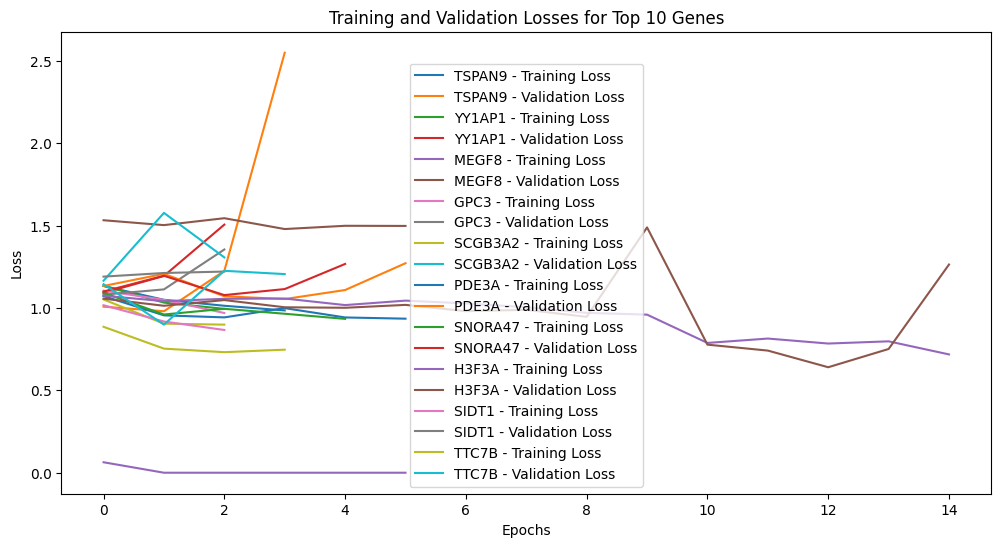

In [5]:

criterion = nn.CrossEntropyLoss()  # Assuming a classification task, change to MSELoss for regression tasks

batch_size = 1
#want to store the models for each gene, the list of losses, list of vals, gene name as uid
gene_performance = {}


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

for gene_idx in range(100):
    

    # Update the dataset index for the current gene
    dataset = PatientDicomDatasetSingleGeneByIndexClass(
        root_dir='data/Images/NSCLC Radiogenomics',
        csv_path='data/df_zscore.csv',
        transform=transform,
        index=gene_idx
    )
    train_size = int(0.7 * len(dataset))
    val_size = int(0.15 * len(dataset))
    test_size = len(dataset) - train_size - val_size

    # Split the dataset
    train_dataset, val_dataset, test_dataset = random_split(
        dataset, [train_size, val_size, test_size]
    )
    _,_,_,gene_name = dataset[0]
    print(f"Training model for gene: {gene_name} (Index: {gene_idx})")
    # Update DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

    # Create a new model for the current gene
    model = CNNClassifier(
        cnn_encoder=MedicalImageCNN(output_dim=128),
        embedding_dim=128,
        num_classes=3  # Single output for the current gene
    )
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


    # Train the model
    train_losses, val_losses = train_model(
        model, train_loader, val_loader,
        criterion, optimizer, device, patience=2
    )

    # Store the losses for the current gene
    gene_performance[gene_name] = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'model': model,
        'total_lost': val_losses[-1],  # Store the last validation loss
        'gene_name': gene_name,
        'test_dataset': test_dataset
    }

    print(f"Finished training for gene: {gene_name}")


#sort by total_lost in descending order
gene_performance = dict(sorted(gene_performance.items(), key=lambda item: item[1]['total_lost'], reverse=True))

# Visualize losses for top 10 genes
top_genes = list(gene_performance.keys())[:10]
# top genes structure: {'gene_name': {'train_losses': [...], 'val_losses': [...], 'model': model, 'total_lost': value}}
plt.figure(figsize=(12, 6))
gene_losses = {gene: gene_performance[gene] for gene in top_genes}
for gene, losses in gene_losses.items():
    plt.plot(losses['train_losses'], label=f'{gene} - Training Loss')
    plt.plot(losses['val_losses'], label=f'{gene} - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses for Top 10 Genes')
plt.legend()
plt.show()


#save the top model
top_gene = list(gene_performance.keys())[0]
top_model = gene_performance[top_gene]['model']
torch.save(top_model.state_dict(), f'models/top_gene_model_{top_gene}.pt')
torch.save(gene_performance, 'gene_performance.pth')


In [ ]:
top_model = gene_performance[top_gene]['model']
torch.save(top_model, f'models/top_gene_model_{top_gene}.pth')

In [ ]:
import torch
import numpy as np
from tqdm import tqdm

def test_model(model, test_loader, device):
    model.eval()
    model.to(device)

    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for images, _, gene_values, _ in tqdm(test_loader, desc="Testing", leave=False):
            images = images.to(device)
            gene_values = gene_values.to(device)

            outputs = model(images)

            all_predictions.append(outputs.cpu().numpy())
            all_targets.append(gene_values.cpu().numpy())

    preds = np.concatenate(all_predictions, axis=0)
    targets = np.concatenate(all_targets, axis=0)

    return preds, targets

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
preds, labels = test_model(model, test_loader, device)

print("Test MSE:", mean_squared_error(labels, preds))
print("Test R² :", r2_score(labels, preds))  # Good for regression quality

Test MSE: 0.1547759473323822
Test R² : -9.104867935180664


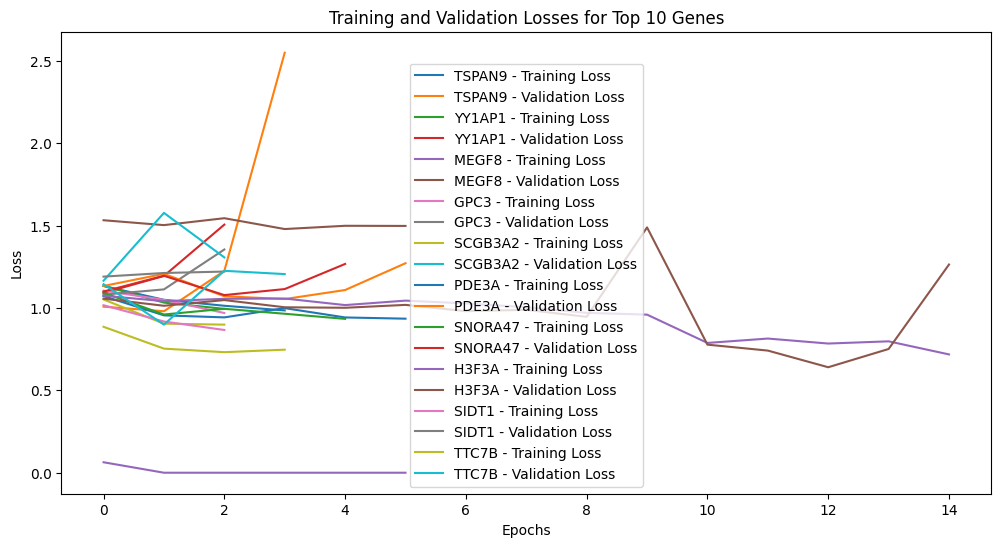

In [6]:
# Visualize losses for top 10 genes
top_genes = list(gene_performance.keys())[:10]
# top genes structure: {'gene_name': {'train_losses': [...], 'val_losses': [...], 'model': model, 'total_lost': value}}
plt.figure(figsize=(12, 6))
gene_losses = {gene: gene_performance[gene] for gene in top_genes}
for gene, losses in gene_losses.items():
    plt.plot(losses['train_losses'], label=f'{gene} - Training Loss')
    plt.plot(losses['val_losses'], label=f'{gene} - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses for Top 10 Genes')
plt.legend()
plt.show()


In [22]:
import pandas as pd

#get gene indexes from data/df_zscore.csv
df_zscore = pd.read_csv('data/df_zscore.csv')
gene_indexes = df_zscore['gene'].tolist()

def get_gene_index(gene_name):
    """
    Get the index of a gene by its name.
    :param gene_name: Name of the gene.
    :return: Index of the gene or None if not found.
    """
    try:
        return df_zscore[df_zscore['gene'] == gene_name].index[0]
    except IndexError:
        return None
#100 genes are indexed from 0 to 99
gene_indexes = list(range(100))  # Assuming the first 100 genes are indexed from 0 to 99
# Print the gene indexes found in df_zscore.csv     
print(f"Gene indexes found in df_zscore.csv: {gene_indexes}")

#sort by total_lost in descending order
gene_performance = dict(sorted(gene_performance.items(), key=lambda item: item[1]['total_lost']))
#print the 100 genes and their losses
    # Create a DataFrame from the gene_performance dictionary
gene_performance_df = pd.DataFrame([
    {'Gene': gene, 'Total Loss': performance['total_lost'], 'Gene Index': get_gene_index(gene)}
    for gene, performance in gene_performance.items()
])

# Sort the DataFrame by 'Total Loss'
gene_performance_df = gene_performance_df.sort_values(by='Total Loss', ascending=True)

# Plot the data using matplotlib
# Print the DataFrame as a table

# Save the DataFrame to a CSV file in the 'tables' folder
output_folder = 'tables'
os.makedirs(output_folder, exist_ok=True)
output_path = os.path.join(output_folder, 'gene_performance_table_100.csv')
gene_performance_df.to_csv(output_path, index=False)
print(f"Table saved to {output_path}")

#delete the data points with less than 0.1 loss
gene_performance_thresholded = {gene: performance for gene, performance in gene_performance.items() if performance['total_lost'] < 0.6}

gene_performance_df = pd.DataFrame([
    {'Gene': gene, 'Total Loss': performance['total_lost'], 'Gene Index': get_gene_index(gene)}
    for gene, performance in gene_performance_thresholded.items()
])
    # Sort the DataFrame by 'Total Loss'
gene_performance_df = gene_performance_df.sort_values(by='Total Loss', ascending=True)

    # Plot the data using matplotlib
output_folder = 'tables'
os.makedirs(output_folder, exist_ok=True)
output_path = os.path.join(output_folder, 'gene_performance_table_lt_0.6.csv')
gene_performance_df.to_csv(output_path, index=False)
print(f"Table saved to {output_path}")


Gene indexes found in df_zscore.csv: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Table saved to tables\gene_performance_table_100.csv
Table saved to tables\gene_performance_table_lt_0.6.csv


saved all the relevant data so can go back to it in case it crashes

problem there is a massive class embalence

In [35]:
from sklearn.metrics import roc_auc_score
import torch.nn.functional as F

def evaluate_model_auc(model, dataloader, device):
    model.eval()
    all_probs = []
    all_targets = []

    with torch.no_grad():
        for images, _, labels, _ in dataloader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)  # [B, num_classes]
            probs = F.softmax(outputs, dim=1)  # Convert logits to probabilities

            all_probs.append(probs.cpu())
            all_targets.append(labels.cpu())

    probs = torch.cat(all_probs).numpy()
    targets = torch.cat(all_targets).numpy()

    try:
        auc = roc_auc_score(targets, probs, multi_class='ovo', average='macro')  # 'ovr' also valid
    except ValueError:
        auc = float('nan')  # Handle degenerate cases

    return auc
def zscore_to_class(z, pos_thresh=0, neg_thresh=0):
    """
    Convert z-score to classification label based
    the thresholds for overexpression and underexpression are about the same"""
    if z >= pos_thresh:
        return 1  # overexpressed
    elif z <= neg_thresh:
        return -1  # underexpressed
    else:
        return 1  # normal

data is super skewed

In [36]:
from sklearn.model_selection import train_test_split

#extract the list of indexes of the genes with less than 0.6 loss
gene_indexes = [get_gene_index(gene) for gene in gene_performance_thresholded.keys() if get_gene_index(gene) is not None]


criterion = nn.CrossEntropyLoss()  # Assuming a classification task, change to MSELoss for regression tasks

batch_size = 1
#want to store the models for each gene, the list of losses, list of vals, gene name as uid
gene_performance = {}


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

for gene_idx in gene_indexes:
    

    # Update the dataset index for the current gene
    dataset = PatientDicomDatasetSingleGeneByIndexClass(
        root_dir='data/Images/NSCLC Radiogenomics',
        csv_path='data/df_zscore.csv',
        transform=transform,
        index=gene_idx
    )
    train_size = int(0.7 * len(dataset))
    val_size = int(0.15 * len(dataset))
    test_size = len(dataset) - train_size - val_size

    # Extract labels for stratification
    labels = [zscore_to_class(float(val)) for val in dataset.gene_values]
    print(f"Labels for gene {gene_idx}: {labels}")


    # Perform stratified split

    train_indices, temp_indices = train_test_split(
        range(len(labels)), test_size=0.3, stratify=labels, random_state=42
    )
    val_indices, test_indices = train_test_split(
        temp_indices, test_size=0.5, stratify=[labels[i] for i in temp_indices], random_state=42
    )

    # Create subsets
    train_dataset = torch.utils.data.Subset(dataset, train_indices)
    val_dataset = torch.utils.data.Subset(dataset, val_indices)
    test_dataset = torch.utils.data.Subset(dataset, test_indices)
    _,_,_,gene_name = dataset[0]
    print(f"Training model for gene: {gene_name} (Index: {gene_idx})")
    # Update DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)

    # Create a new model for the current gene
    model = CNNClassifier(
        cnn_encoder=MedicalImageCNN(output_dim=128),
        embedding_dim=128,
        num_classes=3  # Single output for the current gene
    )
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


    # Train the model
    train_losses, val_losses = train_model(
        model, train_loader, val_loader,
        criterion, optimizer, device, patience=2
    )

    # Store the losses for the current gene
    gene_performance[gene_name] = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'model': model,
        'total_lost': val_losses[-1],  # Store the last validation loss
        'gene_name': gene_name,
        'test_dataset': test_dataset,
        'test_accuracy':evaluate_model_auc(model, test_loader, device),
        'index': gene_idx,
        'dataset_length': len(dataset)
    }

    print(f"Finished training for gene: {gene_name}")
    torch.save(gene_performance, 'gene_performance.pth')


#sort by total_lost in descending order
gene_performance = dict(sorted(gene_performance.items(), key=lambda item: item[1]['total_lost']))

# Visualize losses for top 10 genes
top_genes = list(gene_performance.keys())[:10]


Using device: cuda
Loading CSV and images...
Labels for gene 46: [1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1]
Training model for gene: VGLL4 (Index: 46)

Epoch [1/50]


KeyboardInterrupt: 